In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [70]:
PALETA = ["#67AE6E", "#DDA853", "#94B4C1", "#BE3535"]


def set_style(mode='presentacion'):
    FECEOLOR = "#F5F5DC"
    EDGECOLOR = "#000"
    GRIDCOLOR = "#222222"
    """
    Configura estilos de seaborn/matplotlib según el modo:
      - 'presentacion': tipografía grande, fondo beige y rejilla destacada.
      - 'reporte': tipografía más pequeña, fondo blanco y rejilla suave.
    """
    context = "talk"
    rc = {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "DejaVu Sans"],
        "font.size": 12,
        # titulo
        "figure.titlesize": 38,
        "figure.titleweight": "bold",
        # ejes
        "axes.titlesize": 38,
        "xtick.labelsize": 26,
        "ytick.labelsize": 26,
        "axes.titlepad": 10,
        "axes.facecolor": FECEOLOR,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": EDGECOLOR,
        "axes.grid": True,
        # ejes rejilla
        "grid.color": GRIDCOLOR,
        "grid.linestyle": "--",
        "grid.linewidth": 1.5,
        "grid.alpha": 0.5,
        # ejes etiquetas
        "axes.labelsize": 2,
        # pad entre eje y etiquetas de valores
        "xtick.major.pad": 15,
        "ytick.major.pad": 15,
        # pad entre el nombre del eje y los ticks
        "axes.labelpad": 20,
        # leyenda
        "legend.fontsize": 18,
        "legend.title_fontsize": 20,
        "legend.labelspacing": 1.5,
        "legend.handlelength": 2,
        "legend.handleheight": 0.5,
        "legend.borderpad": 0.5,
        "legend.borderaxespad": 0.5,
        "legend.markerscale": 1.5,
        "legend.framealpha": 0.8,
        "legend.loc": "best",
        "legend.facecolor": FECEOLOR,
        "legend.shadow": True,
        "legend.edgecolor": EDGECOLOR,
        "legend.frameon": True,
        # fondo
        "figure.facecolor": FECEOLOR,
        # figura resolucion y tamaño
        "figure.dpi": 120,
        "figure.figsize": (12, 8),

        "patch.edgecolor": EDGECOLOR,   # color del borde
        "patch.linewidth": 1.0,         # grosor del borde
        "lines.markeredgecolor": EDGECOLOR,
        "lines.markeredgewidth": 1.5,
    }

    sns.set_theme(context=context, palette=PALETA, rc=rc)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETA)

set_style('reporte')

In [71]:
cols_unpd = ['IndicatorName', 'IndicatorShortName', 'Time', 'Iso3', 'PAIS_ESPANIOL', 'Age', 'Sex', 'Category', 'Value']
cols_wb = ['INDICATOR_LABEL', 'REF_AREA', 'UNIT_MEASURE_LABEL', 'TIME_PERIOD', 'OBS_VALUE', 'PAIS', 'PAIS_ESPANIOL']

unpd_df = pd.read_csv("../clean/UNPD_DATASET_AMERICA.csv", low_memory=False, usecols=cols_unpd)
wb_df = pd.read_csv("../clean/WB_ESG_AMERICA.csv", usecols=cols_wb)

In [72]:
unpd_df['IndicatorShortName'].unique()

array(['Live births by age of mother (and sex of child) - complete',
       'Crude birth rate (births per 1,000 population)',
       'Sex ratio at birth (per female newborn)', 'Total fertility rate',
       'Probability of dying by single age and by sex',
       'Deaths by age and sex - complete', 'Total deaths by sex',
       'Life expectancy at exact ages, Ex, by single age and by sex',
       'Child dependency ratio', 'Old-age dependency ratio',
       'Natural change of population', 'Total population by sex',
       'Population density (persons per square km)',
       'Contraceptive users'], dtype=object)

In [73]:
wb_df['INDICATOR_LABEL'].unique()

array(['Agricultural land (% of land area)', 'Tree Cover Loss (hectares)',
       'Forest area (% of land area)',
       'Food production index (2014-2016 = 100)',
       'Control of Corruption: Estimate',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Access to electricity (% of population)',
       'Electricity production from coal sources (% of total)',
       'Renewable electricity output (% of total electricity output)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Energy imports, net (% of energy use)',
       'Fossil fuel energy consumption (% of total)',
       'Energy use (kg of oil equivalent per capita)',
       'CO2 emissions (metric tons per capita)',
       'Methane emissions (metric tons of CO2 equivalent per capita)',
       'Nitrous oxide emissions (metric tons of CO2 equivalent per capita)',
       'PM2.5 air pollution, 

Introduccion

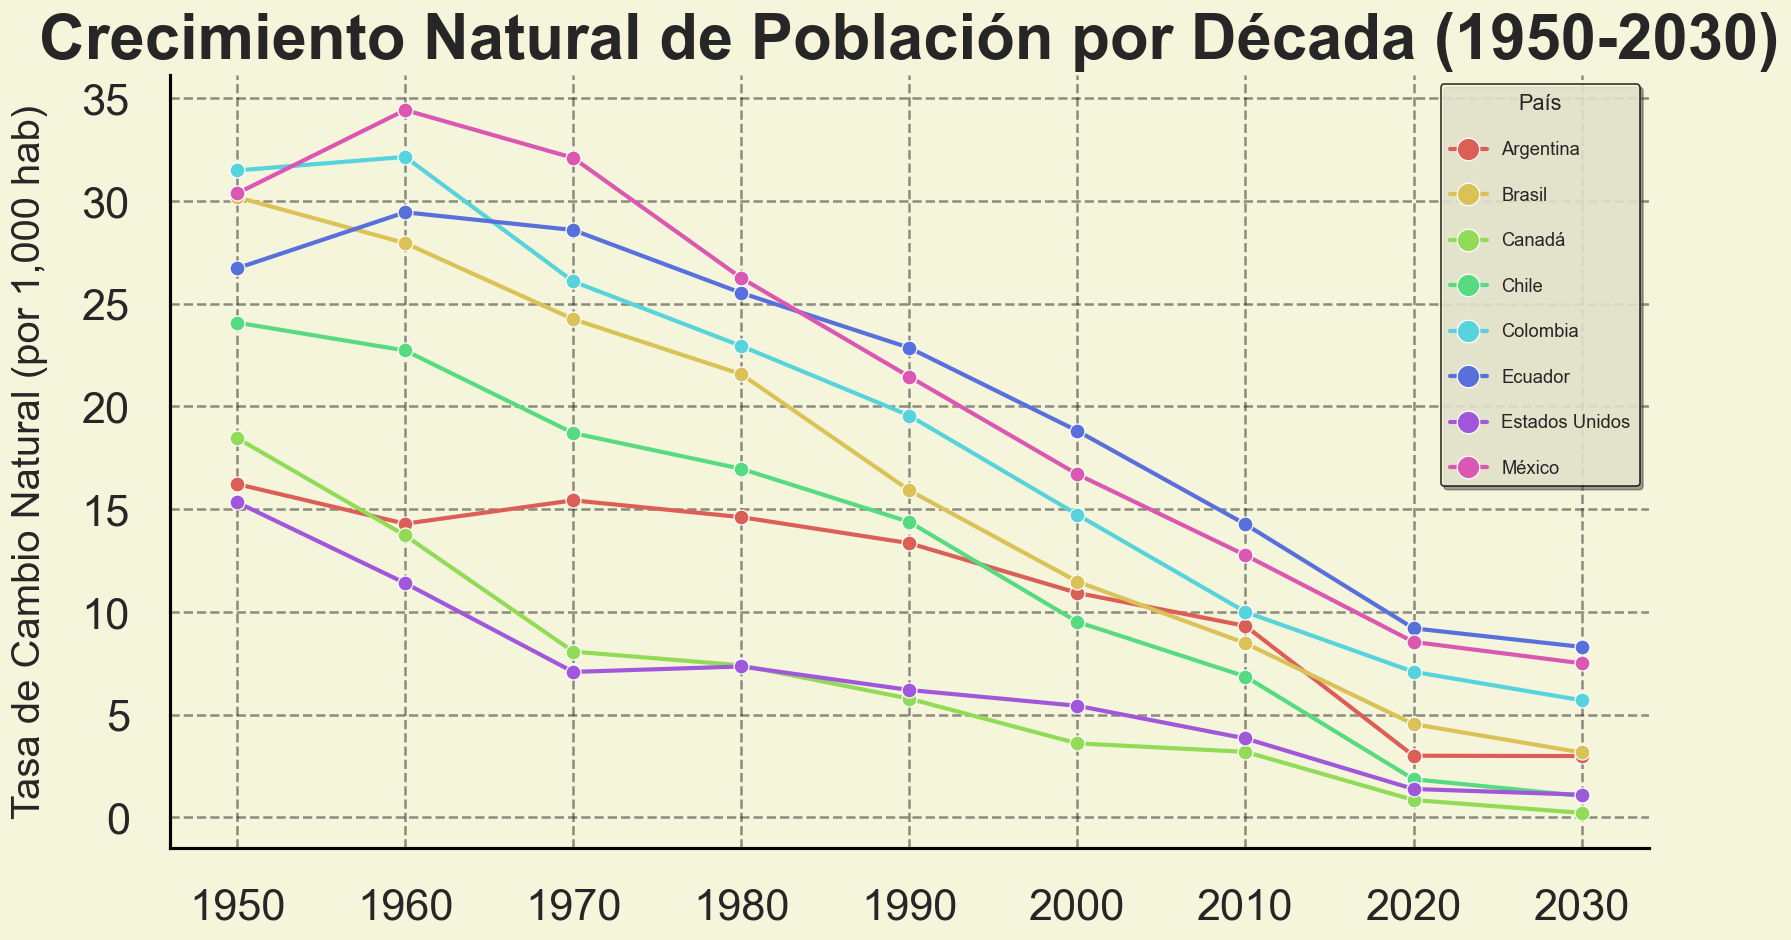

In [74]:
# Filtrar datos relevantes
natural_change = unpd_df[unpd_df['IndicatorShortName'] == 'Natural change of population']
poblacion_total = unpd_df[
    (unpd_df['IndicatorShortName'] == 'Total population by sex') & 
    (unpd_df['Sex'] == 'Both sexes')
]

# Preparar datos: unir cambio natural con población
df = pd.merge(
    natural_change[['Iso3', 'Time', 'Value', 'PAIS_ESPANIOL']],
    poblacion_total[['Iso3', 'Time', 'Value']],
    on=['Iso3', 'Time'],
    suffixes=('_cambio', '_poblacion')
)

# Calcular tasa por 1,000 hab
df['tasa_cambio'] = (df['Value_cambio'] / df['Value_poblacion']) * 1000

# Crear columna de década
df['decada'] = (df['Time'] // 10) * 10

# Filtrar países seleccionados y agrupar
paises_seleccionados = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'México', 'Canadá', 'Estados Unidos', 'Ecuador']
df_filtrado = df[df['PAIS_ESPANIOL'].isin(paises_seleccionados)]
df_agrupado = df_filtrado.groupby(['PAIS_ESPANIOL', 'decada'])['tasa_cambio'].mean().reset_index()

# Configurar estilo visual
plt.figure(figsize=(14, 8))

# Generar gráfico
sns.lineplot(
    data=df_agrupado,
    x='decada',
    y='tasa_cambio',
    hue='PAIS_ESPANIOL',
    marker='o',
    linewidth=2.5,
    palette='hls'
)

# Personalizar
plt.title('Crecimiento Natural de Población por Década (1950-2030)', fontweight='bold')
plt.xlabel('')
plt.ylabel('Tasa de Cambio Natural (por 1,000 hab)', fontsize=24)
plt.xticks(df_agrupado['decada'].unique())
plt.legend(title='País', title_fontsize=13, fontsize=11)
plt.tight_layout()
plt.show()

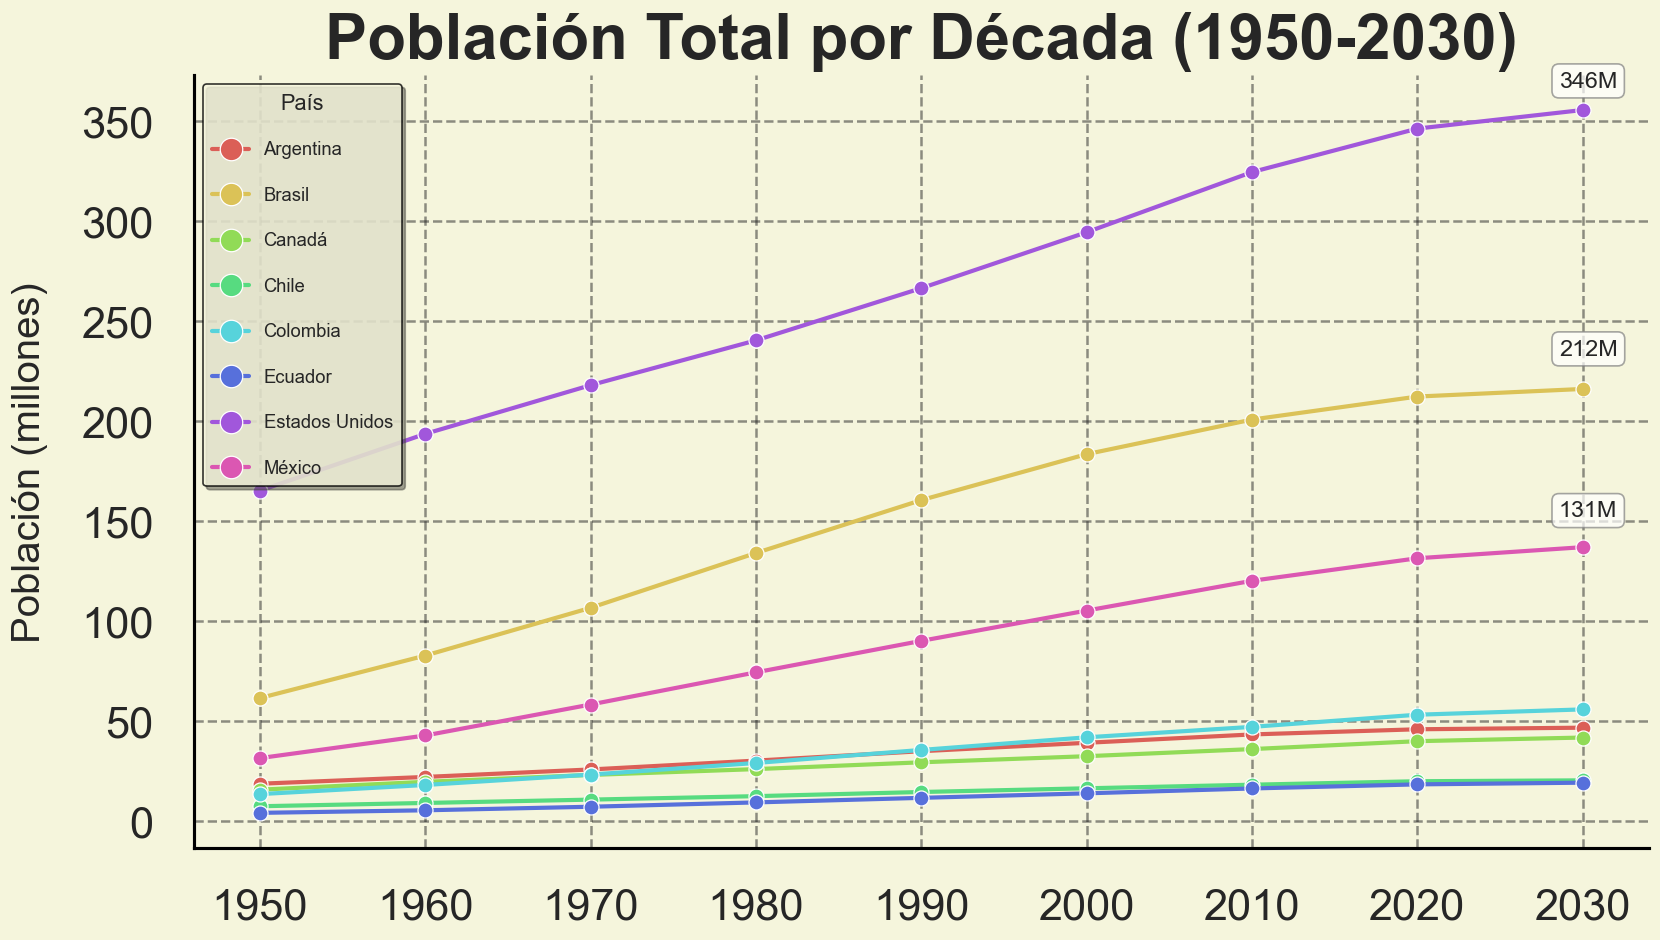

In [75]:
# Seleccionar los mismos países
df_poblacion = poblacion_total[poblacion_total['PAIS_ESPANIOL'].isin(paises_seleccionados)].copy()

# Crear columna de década y convertir a millones
df_poblacion['decada'] = (df_poblacion['Time'] // 10) * 10
df_poblacion['Poblacion_millones'] = df_poblacion['Value'] / 1_000_000

# Agrupar por década
df_agrupado_pob = df_poblacion.groupby(['PAIS_ESPANIOL', 'decada'])['Poblacion_millones'].mean().reset_index()

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Crear gráfico de líneas
sns.lineplot(
    data=df_agrupado_pob,
    x='decada',
    y='Poblacion_millones',
    hue='PAIS_ESPANIOL',
    marker='o',
    linewidth=2.5,
    palette='hls',
    legend='full'
)

# Personalización
plt.title('Población Total por Década (1950-2030)', fontweight='bold')
plt.xlabel('')
plt.ylabel('Población (millones)', fontsize=24)
plt.xticks(df_agrupado_pob['decada'].unique())
plt.legend(title='País', title_fontsize=13, fontsize=11, loc='upper left')

# Añadir etiquetas para los países con mayor población en 2020
for pais in ['Brasil', 'Estados Unidos', 'México']:
    datos_pais = df_agrupado_pob[df_agrupado_pob['PAIS_ESPANIOL'] == pais]
    ultimo_valor = datos_pais[datos_pais['decada'] == 2020].iloc[0]
    plt.annotate(f'{ultimo_valor["Poblacion_millones"]:.0f}M', 
                 (ultimo_valor['decada'], ultimo_valor['Poblacion_millones']),
                 textcoords="offset points", 
                 xytext=(85,25), 
                 ha='left',
                 fontsize=14,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

plt.tight_layout()
plt.show()

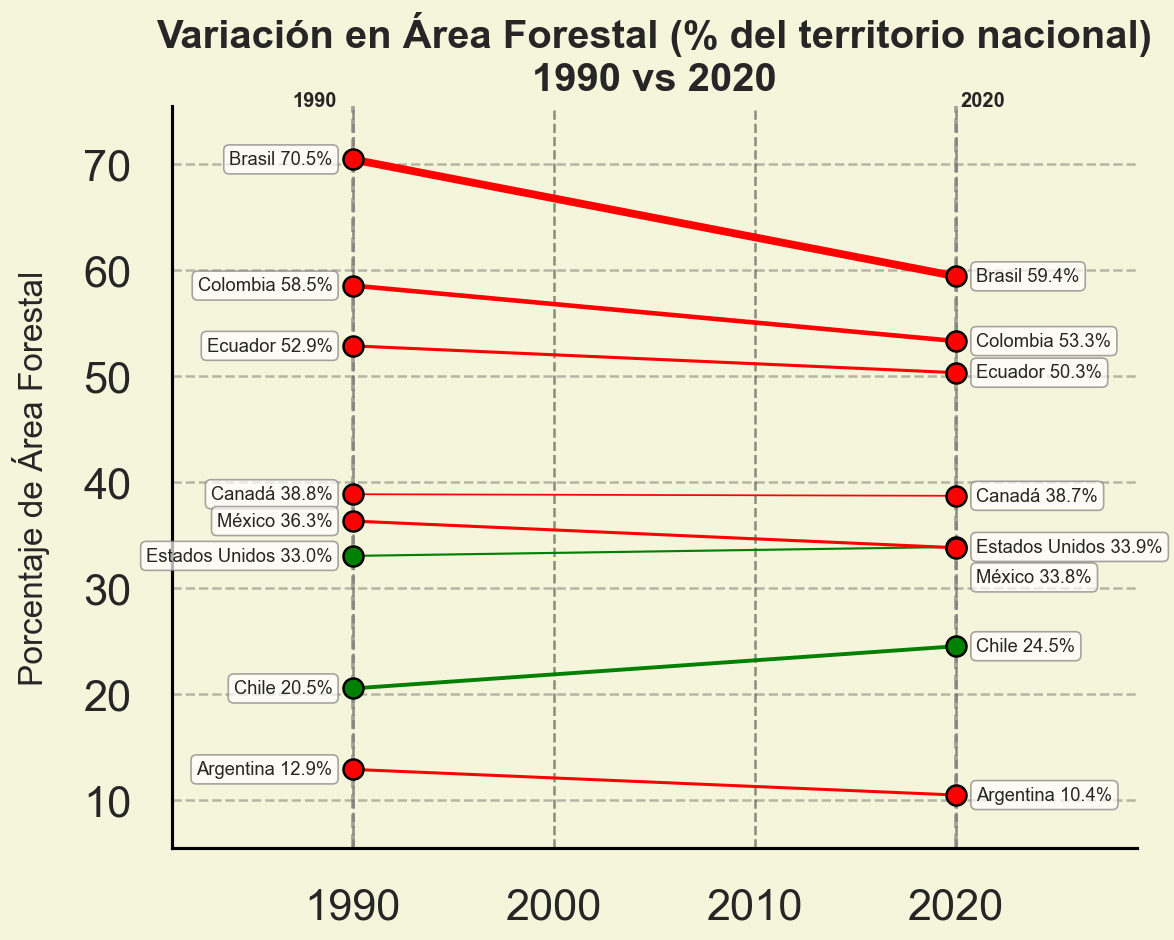

In [76]:
# Filtrar datos relevantes del World Bank
forest_data = wb_df[
    (wb_df['INDICATOR_LABEL'] == 'Forest area (% of land area)') &
    (wb_df['TIME_PERIOD'].isin([1990, 2020])) &
    (wb_df['PAIS_ESPANIOL'].isin(paises_seleccionados))
]

# Pivotar datos para tener columnas separadas por año
forest_pivot = forest_data.pivot_table(
    index='PAIS_ESPANIOL',
    columns='TIME_PERIOD',
    values='OBS_VALUE'
).reset_index()

# Renombrar columnas para claridad
forest_pivot.columns = ['País', '1990', '2020']

# Función para posicionar etiquetas
def add_label(pais, year):
    # Obtener valor
    valor = forest_pivot.loc[forest_pivot['País'] == pais, str(year)].values[0]

    # Determinar posición x
    if year == 1990:
        x_position = year - 1
    else:
        x_position = year + 1

    # Determinar posición y
    if pais == 'México' and year == 2020:
        y_offset = -2.8
    else:
        y_offset = 0
    
    # Agregar texto
    plt.text(x_position, 
             valor + y_offset, 
             f'{pais} {valor:.1f}%', 
             fontsize=11,
             ha='right' if year == 1990 else 'left',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
             va='center')

# Configurar figura
plt.figure(figsize=(10, 8))

# Líneas verticales para los años
plt.axvline(x=1990, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2020, color='gray', linestyle='--', alpha=0.7)

# Textos BEFORE/AFTER
plt.text(1989.2, max(forest_pivot[['1990', '2020']].max()) + 5, '1990', 
         fontsize=12, fontweight='bold', ha='right')
plt.text(2020.2, max(forest_pivot[['1990', '2020']].max()) + 5, '2020', 
         fontsize=12, fontweight='bold', ha='left')

# Trazar líneas para cada país
for idx, row in forest_pivot.iterrows():
    # Determinar color según cambio
    color = 'green' if row['2020'] > row['1990'] else 'red'
    
    # Grosor de línea proporcional al cambio absoluto
    linewidth = 1 + abs(row['2020'] - row['1990'])/3
    
    plt.plot([1990, 2020], 
             [row['1990'], row['2020']], 
             marker='o',
             markersize=12,
             color=color,
             linewidth=linewidth,
             label=row['País'])
    
    # Añadir etiquetas
    add_label(row['País'], 1990)
    add_label(row['País'], 2020)

# Añadir título y ajustes
plt.title('Variación en Área Forestal (% del territorio nacional)\n1990 vs 2020', fontsize=24, fontweight='bold')
plt.ylabel('Porcentaje de Área Forestal', fontsize=20)
plt.xlabel('')
plt.ylim(min(forest_pivot[['1990', '2020']].min()) - 5, 
         max(forest_pivot[['1990', '2020']].max()) + 5)
plt.xlim(1981, 2029)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

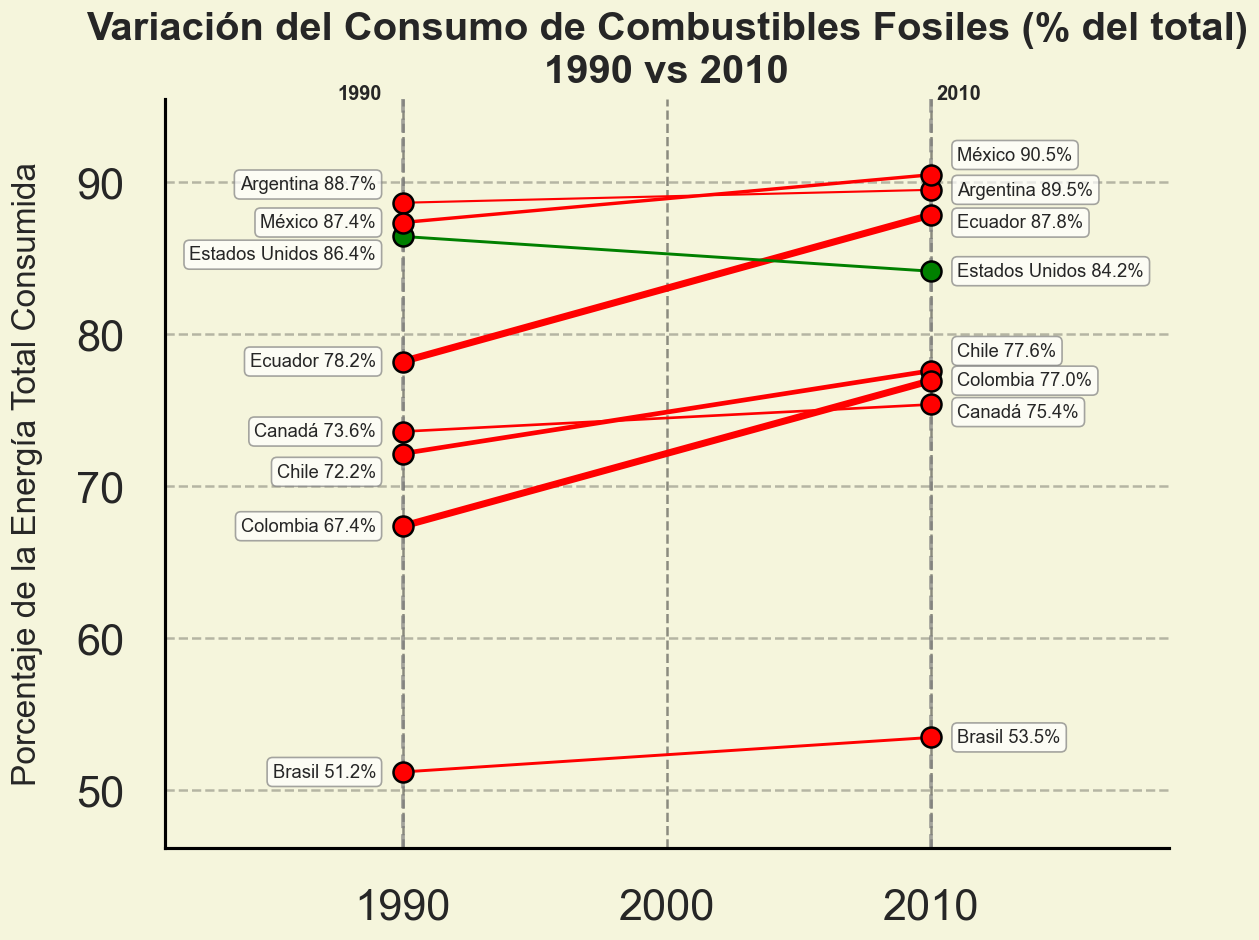

In [77]:
# Filtrar datos relevantes del World Bank
fuel_data = wb_df[
    (wb_df['INDICATOR_LABEL'] == 'Fossil fuel energy consumption (% of total)') &
    (wb_df['TIME_PERIOD'].isin([1990, 2010])) &
    (wb_df['PAIS_ESPANIOL'].isin(paises_seleccionados))
]

# Pivotar datos para tener columnas separadas por año
fuel_pivot = fuel_data.pivot_table(
    index='PAIS_ESPANIOL',
    columns='TIME_PERIOD',
    values='OBS_VALUE'
).reset_index()

# Renombrar columnas para claridad
fuel_pivot.columns = ['País', '1990', '2010']

# Función para posicionar etiquetas
def add_label(pais, year):
    # Obtener valor
    valor = fuel_pivot.loc[fuel_pivot['País'] == pais, str(year)].values[0]

    # Determinar posición x
    if year == 1990:
        x_position = year - 1
    else:
        x_position = year + 1

    # Determinar posición y
    if (pais == 'Canada' or pais == 'Argentina') and year == 1990:
        y_offset = 1.2
    elif (pais == 'Estados Unidos' or pais == 'Chile')and year == 1990:
        y_offset = -1.2
    elif (pais == 'México' or pais == 'Chile') and year == 2010:
        y_offset = 1.3
    elif (pais == 'Ecuador' or pais == 'Canadá') and year == 2010:
        y_offset = -0.5
    else:
        y_offset = 0
    # Agregar texto
    plt.text(x_position, 
             valor + y_offset,
             f'{pais} {valor:.1f}%', 
             fontsize=11,
             ha='right' if year == 1990 else 'left',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
             va='center')

# Configurar figura
plt.figure(figsize=(10, 8))

# Líneas verticales para los años
plt.axvline(x=1990, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2010, color='gray', linestyle='--', alpha=0.7)

# Textos BEFORE/AFTER
plt.text(1989.2, max(fuel_pivot[['1990', '2010']].max()) + 5, '1990', 
         fontsize=12, fontweight='bold', ha='right')
plt.text(2010.2, max(fuel_pivot[['1990', '2010']].max()) + 5, '2010', 
         fontsize=12, fontweight='bold', ha='left')

# Trazar líneas para cada país
for idx, row in fuel_pivot.iterrows():
    # Determinar color según cambio
    color = 'red' if row['2010'] > row['1990'] else 'green'
    
    # Grosor de línea proporcional al cambio absoluto
    linewidth = 1 + abs(row['2010'] - row['1990'])/3
    
    plt.plot([1990, 2010], 
             [row['1990'], row['2010']], 
             marker='o',
             markersize=12,
             color=color,
             linewidth=linewidth,
             label=row['País'])
    
    # Añadir etiquetas
    add_label(row['País'], 1990)
    add_label(row['País'], 2010)

# Añadir título y ajustes
plt.title('Variación del Consumo de Combustibles Fosiles (% del total)\n1990 vs 2010', fontsize=24, fontweight='bold')
plt.ylabel('Porcentaje de la Energía Total Consumida', fontsize=20)
plt.xlabel('')
plt.ylim(min(fuel_pivot[['1990', '2010']].min()) - 5, 
         max(fuel_pivot[['1990', '2010']].max()) + 5)
plt.xlim(1981, 2019)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

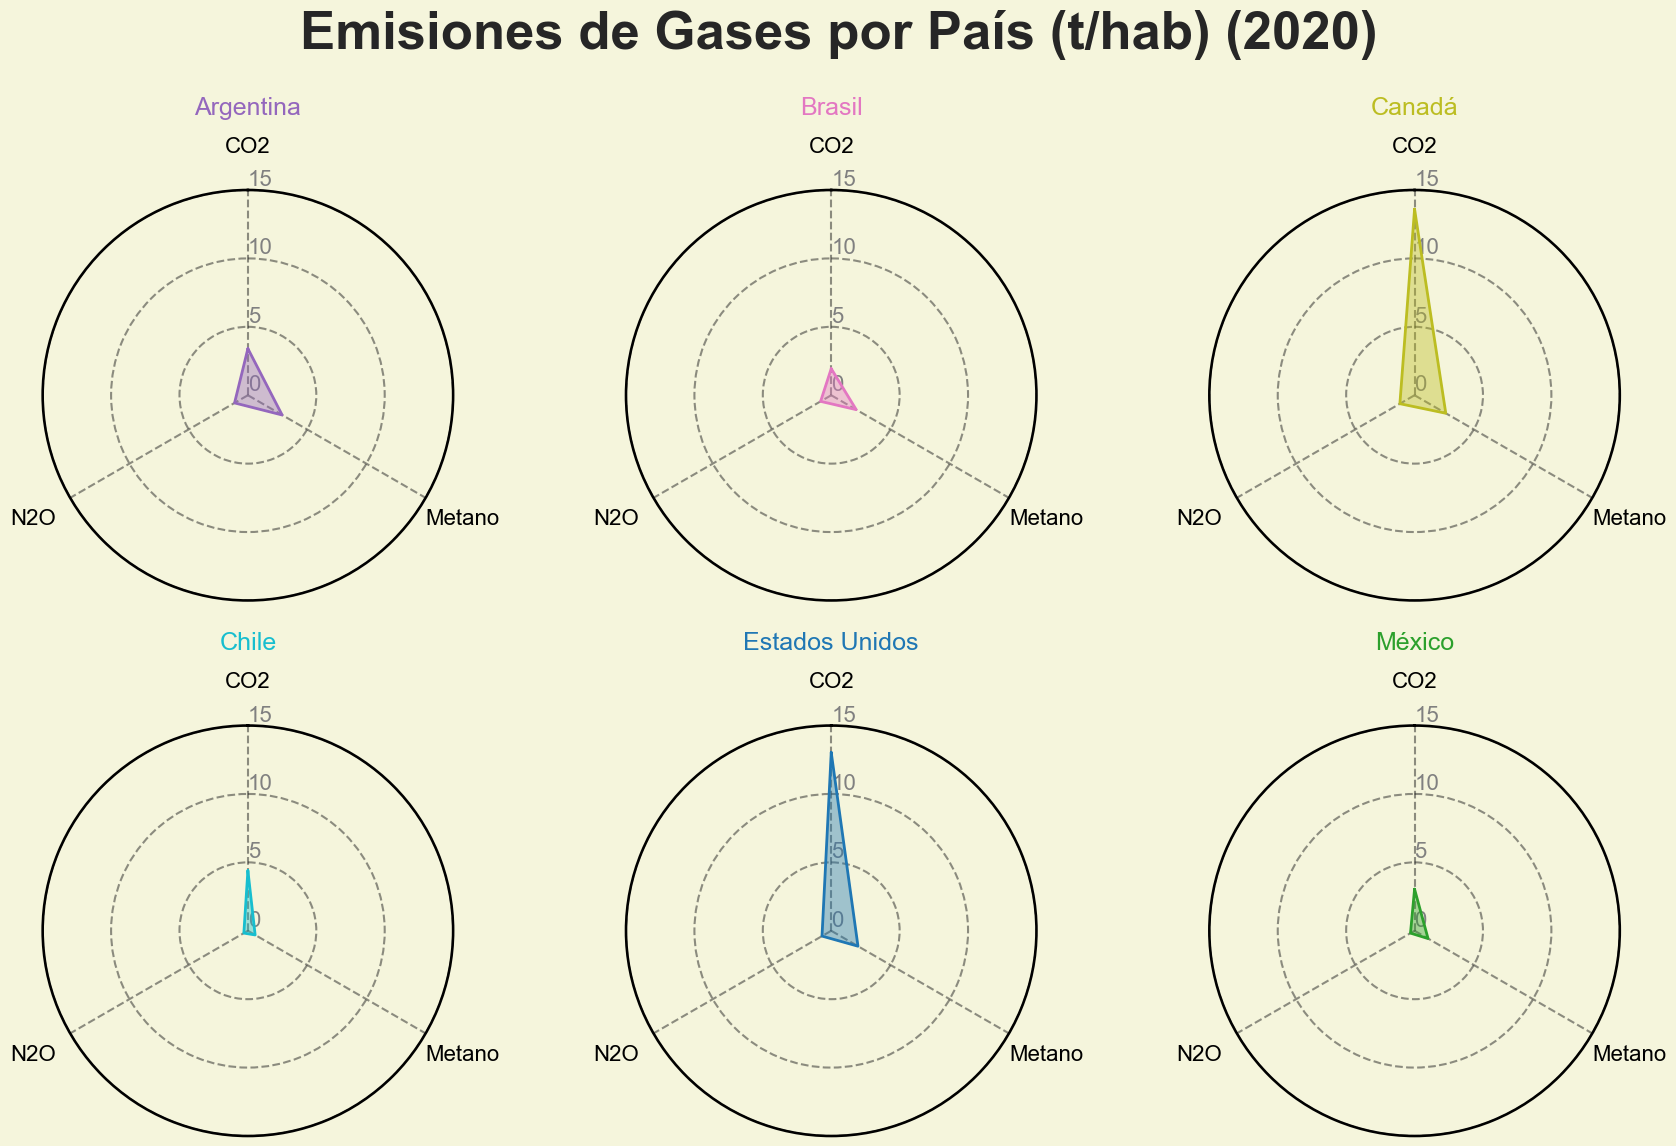

In [78]:
# Seleccionar países e indicadores
selected_countries = ['Estados Unidos', 'México', 'Argentina', 'Brasil', 'Canadá', 'Chile']
selected_indicators = [
    'CO2 emissions (metric tons per capita)',
    'Methane emissions (metric tons of CO2 equivalent per capita)',
    'Nitrous oxide emissions (metric tons of CO2 equivalent per capita)'
]

# Filtrar y preparar datos
df = wb_df[
    (wb_df['PAIS_ESPANIOL'].isin(selected_countries)) &
    (wb_df['INDICATOR_LABEL'].isin(selected_indicators)) &
    (wb_df['TIME_PERIOD'] == 2020)  # Usar el año más reciente disponible
]

# Pivotar datos
pivot_df = df.pivot_table(
    index='PAIS_ESPANIOL',
    columns='INDICATOR_LABEL',
    values='OBS_VALUE',
    aggfunc='mean'
).reset_index()

normalizar = ['CO2 emissions (metric tons per capita)',
'Methane emissions (metric tons of CO2 equivalent per capita)',
'Nitrous oxide emissions (metric tons of CO2 equivalent per capita)']

# Normalizar datos (0-100) para comparación
normalized_df = pivot_df.copy()
for indicator in normalizar:
    if indicator in pivot_df.columns:
        min_val = pivot_df[indicator].min()
        max_val = pivot_df[indicator].max()
        normalized_df[indicator] = 100 * (pivot_df[indicator] - min_val) / (max_val - min_val)

# Acortar nombres de indicadores para visualización
short_names = {
    'CO2 emissions (metric tons per capita)': 'CO2',
    'Methane emissions (metric tons of CO2 equivalent per capita)': 'Metano',
    'Nitrous oxide emissions (metric tons of CO2 equivalent per capita)': 'N2O'
}

# Configurar figura
plt.figure(figsize=(18, 12), dpi=100)
my_palette = plt.get_cmap("tab10", len(selected_countries))

# Función para crear cada gráfico de radar
def make_spider(row, title, color):
    # Configurar ángulos
    categories = list(short_names.values())
    N = len(categories)
    angles = [n / N * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Crear subplot polar
    ax = plt.subplot(2, 3, row+1, polar=True)
    
    # Configuración de ejes
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='black', size=16)
    ax.set_rlabel_position(0)
    plt.yticks([0, 5, 10, 15], ["0", "5", "10", "15"], color="grey", size=16)
    plt.ylim(0, 15)
    
    # Obtener valores
    values = pivot_df.loc[row, list(short_names.keys())].values.flatten().tolist()
    values += values[:1]
    
    # Trazar gráfico
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Añadir título
    plt.title(title, size=18, color=color, y=1.15)

# Generar gráficos para cada país
for i, pais in enumerate(selected_countries):
    # Encontrar índice en el DataFrame
    idx = pivot_df[pivot_df['PAIS_ESPANIOL'] == pais].index[0]
    make_spider(row=idx, title=pais, color=my_palette(i))

# Ajustes finales
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.83)
plt.suptitle('Emisiones de Gases por País (t/hab) (2020)', fontweight='bold')
plt.show()

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Tema


PALETA = ["#67AE6E","#DDA853","#94B4C1","#BE3535"]
def set_style(mode='presentacion'):
    FECEOLOR = "#F5F5DC"
    EDGECOLOR = "#000"
    GRIDCOLOR = "#222222"
    """
    Configura estilos de seaborn/matplotlib según el modo:
      - 'presentacion': tipografía grande, fondo beige y rejilla destacada.
      - 'reporte': tipografía más pequeña, fondo blanco y rejilla suave.
    """
    context = "talk"
    rc = {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "DejaVu Sans"],
        "font.size": 12,
        # titulo
        "figure.titlesize": 30,
        "figure.titleweight": "bold",
        # ejes
        "axes.titlesize": 25,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
        "axes.titlepad": 10,
        "axes.facecolor": FECEOLOR,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": EDGECOLOR,
        "axes.grid": True,
        # ejes rejilla
        "grid.color": GRIDCOLOR,
        "grid.linestyle": "--",
        "grid.linewidth": 1.5,
        "grid.alpha": 0.5,
        # ejes etiquetas
        "axes.labelsize": 20,
        # pad entre eje y etiquetas de valores
        "xtick.major.pad": 15,
        "ytick.major.pad": 15,
        # pad entre el nombre del eje y los ticks
        "axes.labelpad": 20,
        # leyenda
        "legend.fontsize": 18,
        "legend.title_fontsize": 20,
        "legend.labelspacing": 1.5,
        "legend.handlelength": 2,
        "legend.handleheight": 0.5,
        "legend.borderpad": 0.5,
        "legend.borderaxespad": 0.5,
        "legend.markerscale": 1.5,
        "legend.framealpha": 0.8,
        "legend.loc": "best",
        "legend.facecolor": FECEOLOR,
        "legend.shadow": True,
        "legend.edgecolor": EDGECOLOR,
        "legend.frameon": True,
        # fondo
        "figure.facecolor": FECEOLOR,
        # figura resolucion y tamaño
        "figure.dpi": 120,
        "figure.figsize": (12, 8),

        "patch.edgecolor": EDGECOLOR,   # color del borde
        "patch.linewidth": 1.0,         # grosor del borde
        "lines.markeredgecolor": EDGECOLOR,
        "lines.markeredgewidth": 1.5,
        }


    sns.set_theme(context=context, palette=PALETA, rc=rc)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETA)
set_style('presentacion')

In [81]:
import pandas as pd
ruta_archivo = '../clean/WB_ESG_AMERICA.csv'
datos_n = pd.read_csv(ruta_archivo)

columnas_necesarias = ['INDICATOR_LABEL', 'UNIT_MEASURE_LABEL', 'TIME_PERIOD', 'OBS_VALUE','REF_AREA','PAIS_ESPANIOL']
datos = datos_n[columnas_necesarias]
datos.head(200)



INDICATOR_LABEL       UNIT_MEASURE_LABEL  TIME_PERIOD  \
0    Agricultural land (% of land area)  Percentage of land area         1961   
1    Agricultural land (% of land area)  Percentage of land area         1961   
2    Agricultural land (% of land area)  Percentage of land area         1961   
3    Agricultural land (% of land area)  Percentage of land area         1961   
4    Agricultural land (% of land area)  Percentage of land area         1961   
..                                  ...                      ...          ...   
195  Agricultural land (% of land area)  Percentage of land area         1967   
196  Agricultural land (% of land area)  Percentage of land area         1967   
197  Agricultural land (% of land area)  Percentage of land area         1967   
198  Agricultural land (% of land area)  Percentage of land area         1967   
199  Agricultural land (% of land area)  Percentage of land area         1967   

     OBS_VALUE REF_AREA         PAIS_ESPANIOL  
0    50.363395      ARG             Argentina  
1     0.999001      BHS           Las Bahamas  
2     3.463393      BLZ                Belice  
3    27.731930      BOL               Bolivia  
4    18.779178      BRA                Brasil  
..         ...      ...                   ...  
195  32.040736      CRI            Costa Rica  
196  43.026071      CUB                  Cuba  
197  47.195198      DOM  República Dominicana  
198  17.121803      ECU               Ecuador  
199  25.457260      GTM             Guatemala  

[200 rows x 6 columns]

In [82]:
print(datos_n['INDICATOR_LABEL'].unique())

['Agricultural land (% of land area)' 'Tree Cover Loss (hectares)'
 'Forest area (% of land area)' 'Food production index (2014-2016 = 100)'
 'Control of Corruption: Estimate'
 'Access to clean fuels and technologies for cooking (% of population)'
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
 'Access to electricity (% of population)'
 'Electricity production from coal sources (% of total)'
 'Renewable electricity output (% of total electricity output)'
 'Renewable energy consumption (% of total final energy consumption)'
 'Energy imports, net (% of energy use)'
 'Fossil fuel energy consumption (% of total)'
 'Energy use (kg of oil equivalent per capita)'
 'CO2 emissions (metric tons per capita)'
 'Methane emissions (metric tons of CO2 equivalent per capita)'
 'Nitrous oxide emissions (metric tons of CO2 equivalent per capita)'
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
 'Cooling Degree Days' 'Coastal protection'
 'GHG net emissions/remov

In [83]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1. Cargar datos ya filtrados (solo América Latina)
df = pd.read_csv('../clean/WB_ESG_AMERICA.csv')

# 2. Filtrar años específicos y el indicador forestal
forest_data = df[
    (df['INDICATOR_LABEL'] == 'Forest area (% of land area)') & 
    (df['TIME_PERIOD'].isin([1990, 2000, 2010, 2021]))
]

# 3. Cargar GeoJSON y filtrar países latinoamericanos
world = gpd.read_file('../clean/countries.geojson')
latin_america_codes = forest_data['REF_AREA'].unique()
latin_america_map = world[world['ISO3166-1-Alpha-3'].isin(latin_america_codes)]

# 4. Combinar con datos forestales
merged = latin_america_map.merge(
    forest_data,
    left_on='ISO3166-1-Alpha-3',
    right_on='REF_AREA',
    how='left'
)

In [84]:
def crear_mapa_coropletico(year, data):
    """Genera un mapa coroplético para un año específico."""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Filtrar datos por año
    data_year = data[data['TIME_PERIOD'] == year]
    
    # Mapa coroplético
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    data_year.plot(
        column='OBS_VALUE',
        cmap='YlGn',
        legend=True,
        ax=ax,
        cax=cax,
        missing_kwds={'color': 'lightgrey'},
        edgecolor='black',
        linewidth=0.5
    )
    
    ax.set_title(f'Área Forestal (% del Área Terrestre) - Año {year}')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

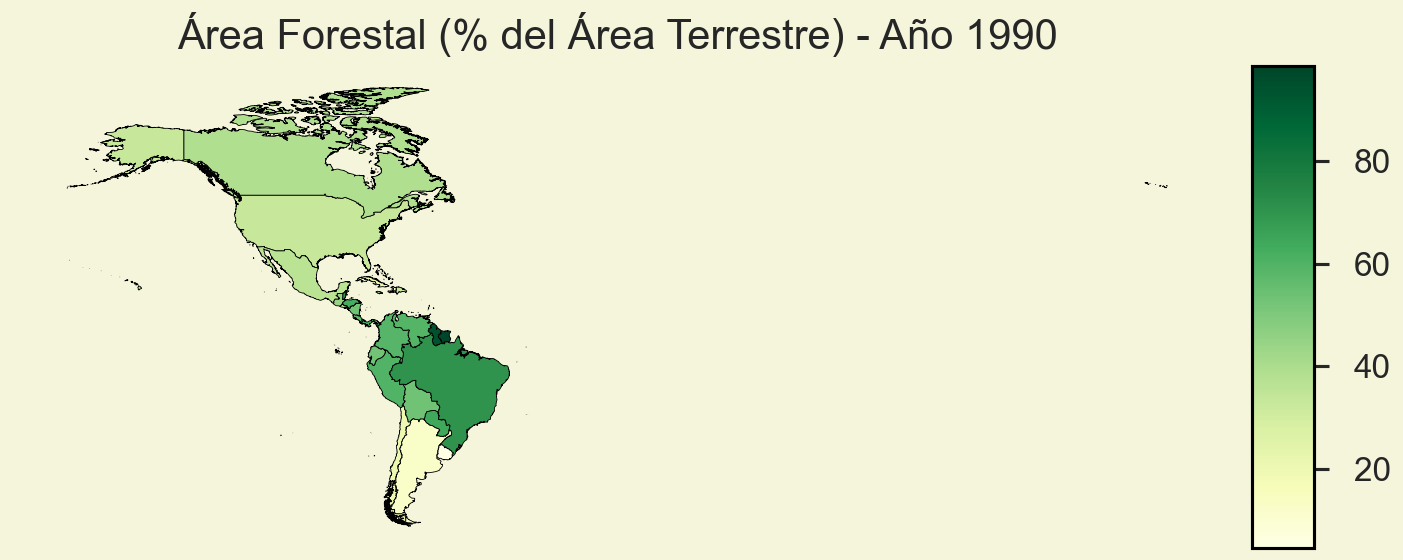

In [85]:
# Lista de años a graficar
years = [1990, 2000, 2010, 2021]

# Crear un mapa por año
for year in years:
    crear_mapa_coropletico(year, merged)

In [86]:
import pandas as pd

tree = datos[datos['INDICATOR_LABEL'] == 'Tree Cover Loss (hectares)']

# 4. Opcional: Resetear el índice si lo prefieres (evita índices dispersos)
tree = tree.reset_index(drop=True)

# 5. Verificar resultados
print(f"Número de registros de 'Forest area': {len(tree)}")
tree.head()


Número de registros de 'Forest area': 620


INDICATOR_LABEL UNIT_MEASURE_LABEL  TIME_PERIOD  OBS_VALUE  \
0  Tree Cover Loss (hectares)           Hectares         2002   105002.0   
1  Tree Cover Loss (hectares)           Hectares         2002      701.0   
2  Tree Cover Loss (hectares)           Hectares         2002    13474.0   
3  Tree Cover Loss (hectares)           Hectares         2002   178808.0   
4  Tree Cover Loss (hectares)           Hectares         2002  3507049.0   

  REF_AREA PAIS_ESPANIOL  
0      ARG     Argentina  
1      BHS   Las Bahamas  
2      BLZ        Belice  
3      BOL       Bolivia  
4      BRA        Brasil

In [87]:
print(tree['TIME_PERIOD'].unique())

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021]


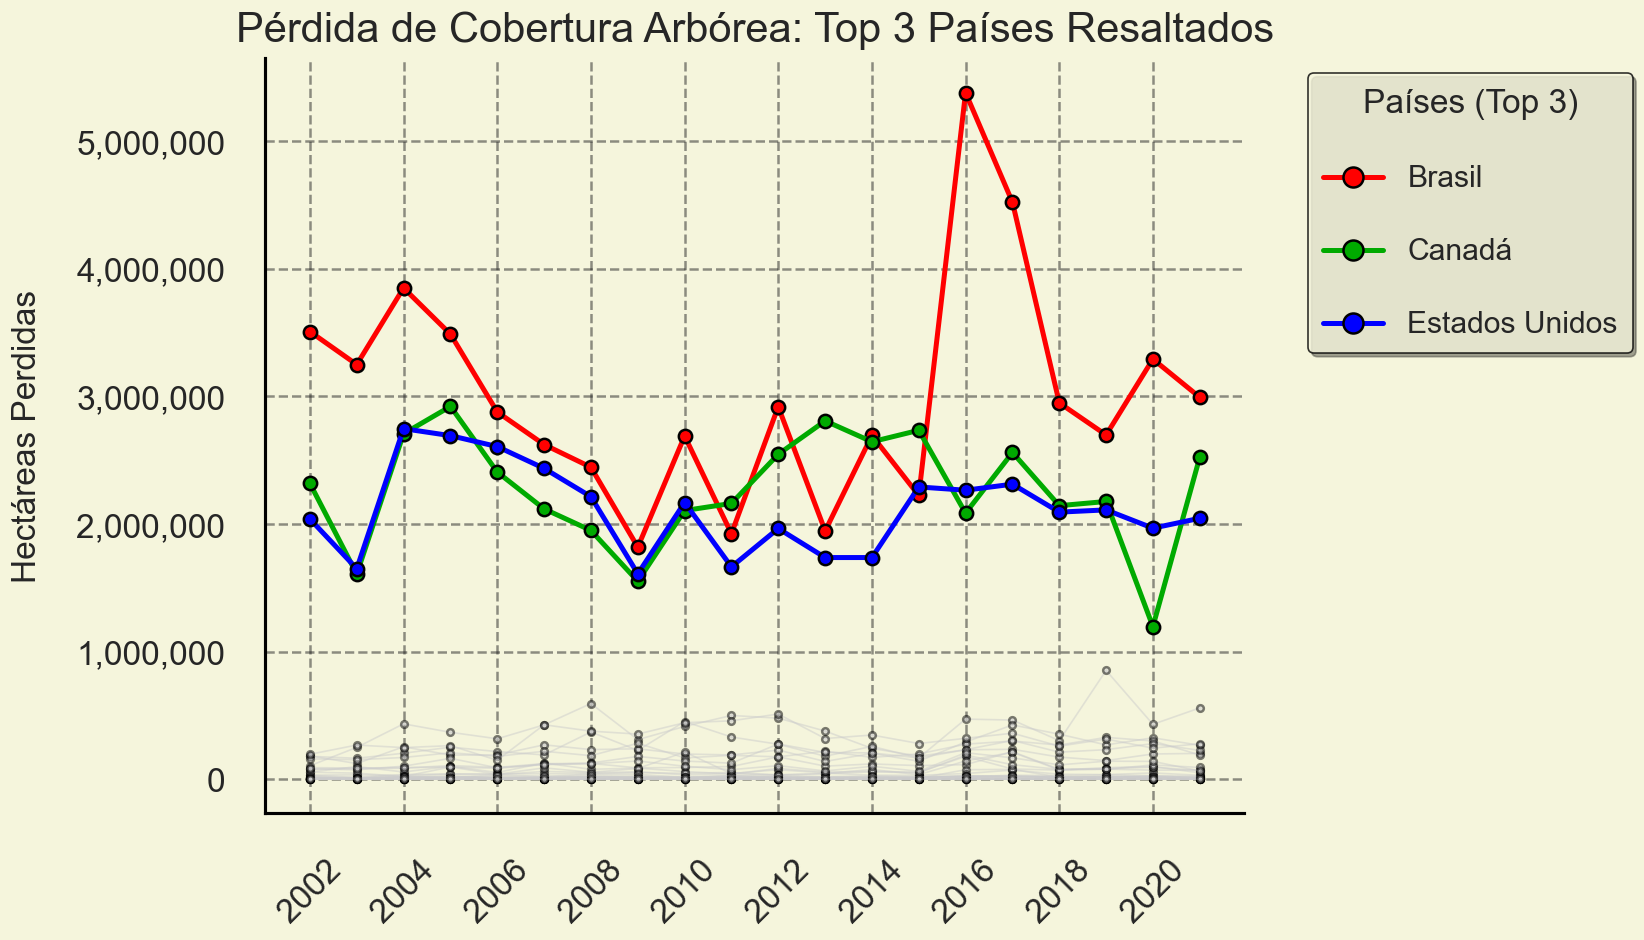

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Filtrar y preparar datos
tree = datos[datos['INDICATOR_LABEL'] == 'Tree Cover Loss (hectares)'].copy()
tree['TIME_PERIOD'] = pd.to_datetime(tree['TIME_PERIOD'], format='%Y')

# 2. Identificar los 3 países con mayores valores (usando el promedio o máximo)
top_paises = tree.groupby('PAIS_ESPANIOL')['OBS_VALUE'].max().nlargest(3).index.tolist()  # Top 3 por máximo
# Alternativa: Usar .mean() en lugar de .max() para considerar el promedio histórico

# 3. Configurar estilos
plt.figure(figsize=(14, 8))
colores_top = ['#FF0000', '#00AA00', '#0000FF']  # Rojo, Verde, Azul para los top 3
color_base = '#CCCCCC'  # Gris para el resto

# 4. Graficar todos los países (en gris y línea delgada)
for pais in tree['PAIS_ESPANIOL'].unique():
    data_pais = tree[tree['PAIS_ESPANIOL'] == pais]
    if pais in top_paises:
        # Top 3: Línea gruesa y color llamativo
        color = colores_top[top_paises.index(pais)]
        plt.plot(
            data_pais['TIME_PERIOD'], 
            data_pais['OBS_VALUE'], 
            marker='o', 
            label=pais,
            linewidth=3,
            color=color,
            markersize=8
        )
    else:
        # Resto: Línea delgada y gris
        plt.plot(
            data_pais['TIME_PERIOD'], 
            data_pais['OBS_VALUE'], 
            marker='o', 
            linewidth=1,
            color=color_base,
            alpha=0.5,
            markersize=4
        )

# 5. Personalización adicional
plt.title('Pérdida de Cobertura Arbórea: Top 3 Países Resaltados')
plt.xlabel('')
plt.ylabel('Hectáreas Perdidas')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Formatear eje Y para valores grandes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Leyenda solo para los top 3 (opcional: añadir "Otros países" si deseas)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles, 
    labels, 
    title='Países (Top 3)', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.tight_layout()
plt.show()

In [89]:
import pandas as pd

emisiones = datos[datos['INDICATOR_LABEL'] == 'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)']

# 4. Opcional: Resetear el índice si lo prefieres (evita índices dispersos)
emisiones = emisiones.reset_index(drop=True)

# 5. Verificar resultados
print(f"Número de registros de 'Forest area': {len(emisiones)}")
emisiones.head()

Número de registros de 'Forest area': 68


INDICATOR_LABEL      UNIT_MEASURE_LABEL  \
0  GHG net emissions/removals by LUCF (Mt of CO2 ...  Metric tons per capita   
1  GHG net emissions/removals by LUCF (Mt of CO2 ...  Metric tons per capita   
2  GHG net emissions/removals by LUCF (Mt of CO2 ...  Metric tons per capita   
3  GHG net emissions/removals by LUCF (Mt of CO2 ...  Metric tons per capita   
4  GHG net emissions/removals by LUCF (Mt of CO2 ...  Metric tons per capita   

   TIME_PERIOD   OBS_VALUE REF_AREA      PAIS_ESPANIOL  
0         1990  -67.484978      CAN             Canadá  
1         1990   46.947400      ECU            Ecuador  
2         1990  -39.545800      GTM          Guatemala  
3         1990   -1.496200      TTO  Trinidad y Tobago  
4         1990 -846.554878      USA     Estados Unidos

In [90]:
print(emisiones['TIME_PERIOD'].unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009]


In [91]:
import pandas as pd

# Asumiendo que ya tienes el dataframe 'datos' cargado
emisiones = datos[datos['INDICATOR_LABEL'] == 'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)']
emisiones = emisiones.reset_index(drop=True)

# Calcular el promedio por país
promedios_paises = emisiones.groupby(['PAIS_ESPANIOL'])['OBS_VALUE'].mean().reset_index()

# Ordenar para obtener los más negativos (menores valores)
top5_negativos = promedios_paises.sort_values('OBS_VALUE').head(5)

# Ordenar para obtener los más positivos (mayores valores)
top5_positivos = promedios_paises.sort_values('OBS_VALUE', ascending=False).head(5)

# Mostrar resultados
print("\nTop 5 países con valores más negativos (mayores remociones):")
print(top5_negativos[['PAIS_ESPANIOL', 'OBS_VALUE']])

print("\nTop 5 países con valores más positivos (mayores emisiones):")
print(top5_positivos[['PAIS_ESPANIOL', 'OBS_VALUE']])

# Verificar número de registros
print(f"\nNúmero de registros de 'GHG net emissions/removals by LUCF': {len(emisiones)}")


Top 5 países con valores más negativos (mayores remociones):
     PAIS_ESPANIOL   OBS_VALUE
12  Estados Unidos -823.026356
0        Argentina  -43.297900
13       Guatemala  -39.545800
14          Guyana  -30.866000
9             Cuba  -21.654300

Top 5 países con valores más positivos (mayores emisiones):
   PAIS_ESPANIOL  OBS_VALUE
4         Brasil  1329.0500
18        México    70.2028
22          Perú    56.8270
3        Bolivia    48.0473
10       Ecuador    46.9474

Número de registros de 'GHG net emissions/removals by LUCF': 68


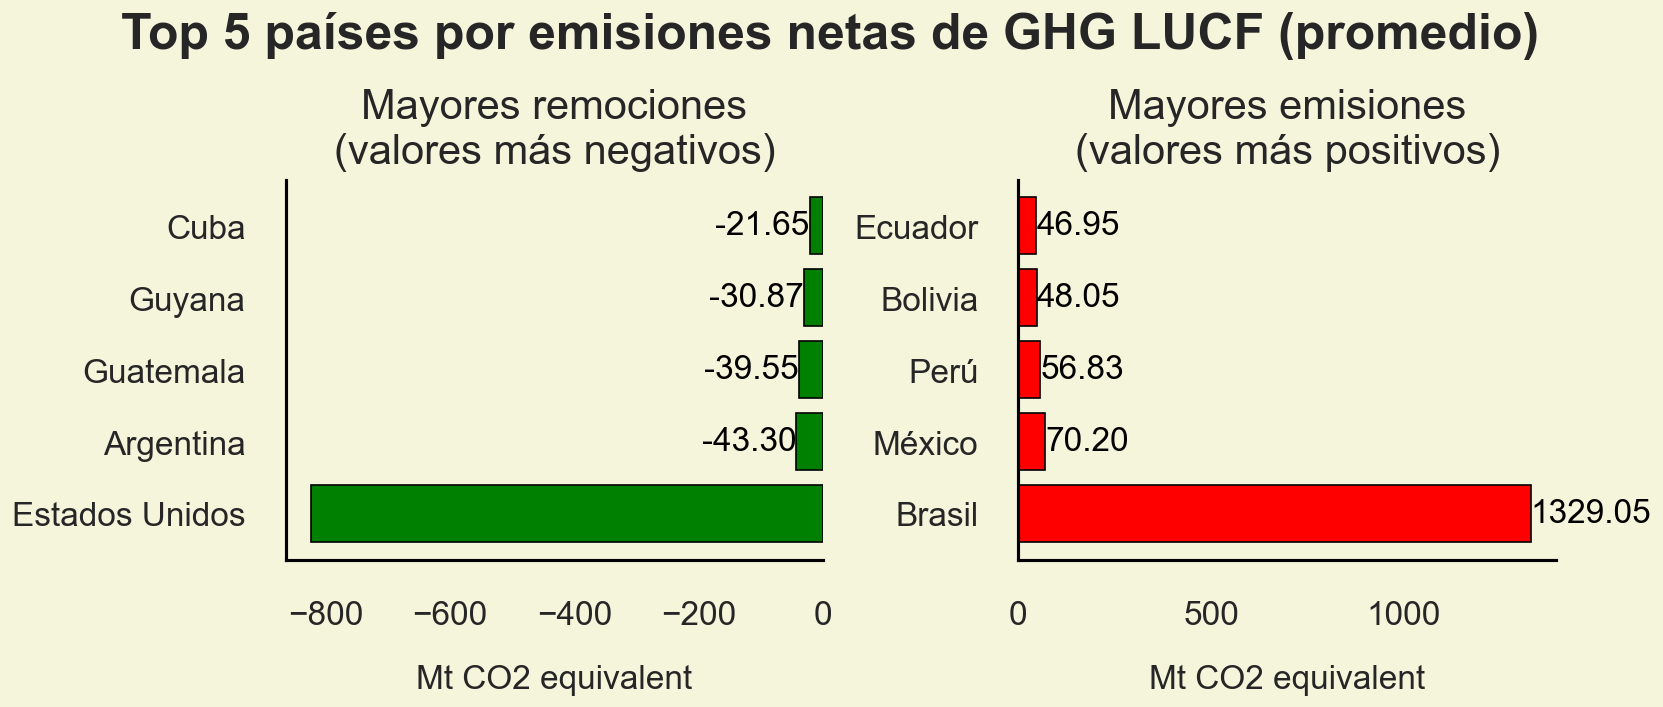

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar datos
top5_negativos_sorted = top5_negativos.sort_values('OBS_VALUE', ascending=True)
top5_positivos_sorted = top5_positivos.sort_values('OBS_VALUE', ascending=False)

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Top 5 países por emisiones netas de GHG LUCF (promedio)')

# Gráfica para valores más negativos (remociones)
bars1 = ax1.barh(top5_negativos_sorted['PAIS_ESPANIOL'], 
                top5_negativos_sorted['OBS_VALUE'], 
                color='green')
ax1.set_title('Mayores remociones\n(valores más negativos)')
ax1.set_xlabel('Mt CO2 equivalent')

# Gráfica para valores más positivos (emisiones)
bars2 = ax2.barh(top5_positivos_sorted['PAIS_ESPANIOL'], 
                top5_positivos_sorted['OBS_VALUE'], 
                color='red')
ax2.set_title('Mayores emisiones\n(valores más positivos)')
ax2.set_xlabel('Mt CO2 equivalent')

# Añadir los valores en las barras
def add_value_labels(ax, bars):
    for bar in bars:
        width = bar.get_width()
        if width < -800:
            continue
        ax.text(width if width > 0 else width - 0.2,  # Posición x (ajustada para negativos)
                bar.get_y() + bar.get_height()/2,      # Posición y (centrada)
                f'{width:.2f}',                         # Texto con 2 decimales
                va='center', ha='left' if width > 0 else 'right',
                color='black', fontsize=20)

add_value_labels(ax1, bars1)
add_value_labels(ax2, bars2)
# Quitar las líneas de la cuadrícula
ax1.grid(False)
ax2.grid(False)
# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

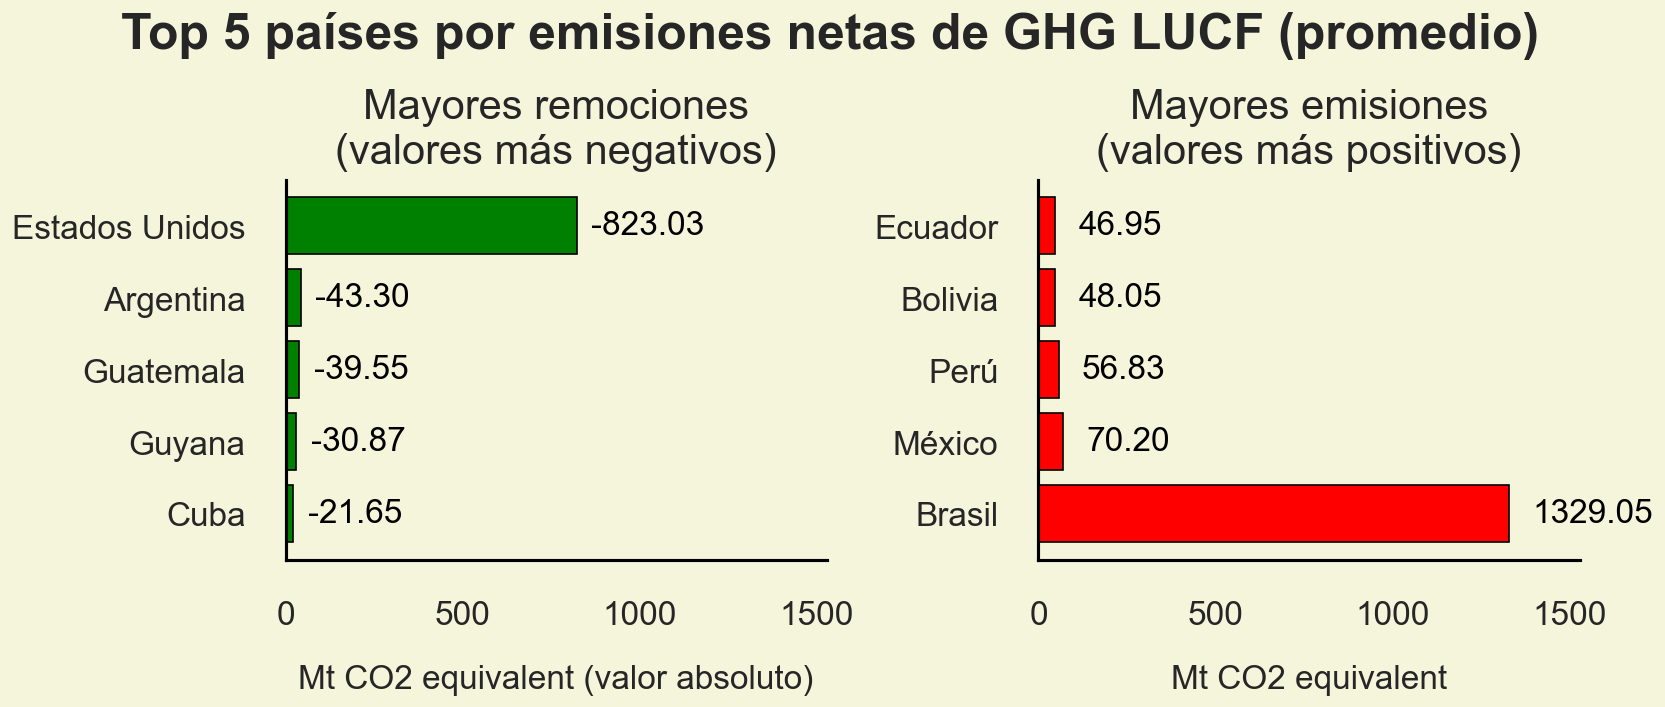

In [93]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Top 5 países por emisiones netas de GHG LUCF (promedio)')

# Preparar datos (convertir negativos a positivos para visualización)
top5_negativos_sorted = top5_negativos.sort_values('OBS_VALUE', ascending=False)
top5_positivos_sorted = top5_positivos.sort_values('OBS_VALUE', ascending=False)

# Gráfica para valores más negativos (remociones)
bars1 = ax1.barh(top5_negativos_sorted['PAIS_ESPANIOL'], 
                -top5_negativos_sorted['OBS_VALUE'],  # Convertimos a positivo para visualización
                color='green')
ax1.set_title('Mayores remociones\n(valores más negativos)')
ax1.set_xlabel('Mt CO2 equivalent (valor absoluto)')

# Gráfica para valores más positivos (emisiones)
bars2 = ax2.barh(top5_positivos_sorted['PAIS_ESPANIOL'], 
                top5_positivos_sorted['OBS_VALUE'], 
                color='red')
ax2.set_title('Mayores emisiones\n(valores más positivos)')
ax2.set_xlabel('Mt CO2 equivalent')

# Función para añadir etiquetas con el valor real (no absoluto)
def add_value_labels(ax, bars, is_negative=False):
    for bar in bars:
        width = bar.get_width()
        value = -width if is_negative else width  # Recuperamos el valor original
        ax.text(width + (0.05 * max([b.get_width() for b in bars])),  # Posición x
                bar.get_y() + bar.get_height()/2,                     # Posición y
                f'{value:.2f}',                                      # Texto con valor original
                va='center', ha='left',
                color='black', fontsize=20)

add_value_labels(ax1, bars1, is_negative=True)
add_value_labels(ax2, bars2)

# Ajustar los límites del eje x para mejor visualización
max_val = max(top5_positivos_sorted['OBS_VALUE'].max(), 
              -top5_negativos_sorted['OBS_VALUE'].min())
ax1.set_xlim(0, max_val * 1.15)
ax2.set_xlim(0, max_val * 1.15)
ax1.grid(False)
ax2.grid(False)
# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itables


# Tema


PALETA = ["#67AE6E","#DDA853","#94B4C1","#BE3535"]
def set_style(mode='presentacion'):
    FECEOLOR = "#F5F5DC"
    EDGECOLOR = "#000"
    GRIDCOLOR = "#222222"
    """
    Configura estilos de seaborn/matplotlib según el modo:
      - 'presentacion': tipografía grande, fondo beige y rejilla destacada.
      - 'reporte': tipografía más pequeña, fondo blanco y rejilla suave.
    """
    context = "talk"
    rc = {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "DejaVu Sans"],
        "font.size": 12,
        # titulo
        "figure.titlesize": 38,
        "figure.titleweight": "bold",
        # ejes
        "axes.titlesize": 38,
        "xtick.labelsize": 26,
        "ytick.labelsize": 26,
        "axes.titlepad": 10,
        "axes.facecolor": FECEOLOR,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": EDGECOLOR,
        "axes.grid": True,
        # ejes rejilla
        "grid.color": GRIDCOLOR,
        "grid.linestyle": "--",
        "grid.linewidth": 1.5,
        "grid.alpha": 0.5,
        # ejes etiquetas
        "axes.labelsize": 20,
        # pad entre eje y etiquetas de valores
        "xtick.major.pad": 15,
        "ytick.major.pad": 15,
        # pad entre el nombre del eje y los ticks
        "axes.labelpad": 20,
        # leyenda
        "legend.fontsize": 18,
        "legend.title_fontsize": 20,
        "legend.labelspacing": 1.5,
        "legend.handlelength": 2,
        "legend.handleheight": 0.5,
        "legend.borderpad": 0.5,
        "legend.borderaxespad": 0.5,
        "legend.markerscale": 1.5,
        "legend.framealpha": 0.8,
        "legend.loc": "best",
        "legend.facecolor": FECEOLOR,
        "legend.shadow": True,
        "legend.edgecolor": EDGECOLOR,
        "legend.frameon": True,
        # fondo
        "figure.facecolor": FECEOLOR,
        # figura resolucion y tamaño
        "figure.dpi": 120,
        "figure.figsize": (12, 8),

        "patch.edgecolor": EDGECOLOR,   # color del borde
        "patch.linewidth": 1.0,         # grosor del borde
        "lines.markeredgecolor": EDGECOLOR,
        "lines.markeredgewidth": 1.5,
        }


    sns.set_theme(context=context, palette=PALETA, rc=rc)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETA)
set_style('presentacion')

In [95]:
wb = pd.read_csv("../clean/WB_ESG_AMERICA.csv")
unpd = pd.read_csv("../clean/UNPD_DATASET_AMERICA.csv")

C:\Users\marti\AppData\Local\Temp\ipykernel_26476\3299224523.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  unpd = pd.read_csv("../clean/UNPD_DATASET_AMERICA.csv")


In [96]:
from matplotlib.ticker import StrMethodFormatter

EXPANSION_AGRICOLA, PERDIDA_BOSQUES = 'Agricultural land (% of land area)','Tree Cover Loss (hectares)'
df = wb[wb['INDICATOR_LABEL'].isin([EXPANSION_AGRICOLA, PERDIDA_BOSQUES])].copy()
df = df[['PAIS_ESPANIOL', 'TIME_PERIOD', 'INDICATOR_LABEL', 'OBS_VALUE']].copy()
y = 2002
df_y = df[df['TIME_PERIOD'] >= y].copy()
df_wide = df_y.pivot(index=['PAIS_ESPANIOL', 'TIME_PERIOD'],
                     columns='INDICATOR_LABEL',
                     values='OBS_VALUE') \
              .reset_index()
paises_destacados = ['Estados Unidos', 'Canadá', 'Brasil']
df_wide['PAIS_ESPANIOL'] = df_wide['PAIS_ESPANIOL'].where(
       df_wide['PAIS_ESPANIOL'].isin(paises_destacados),
       other='Otros'
)
df_wide['Países'] = df_wide['PAIS_ESPANIOL']
sns.scatterplot(
    data=df_wide,
    x=EXPANSION_AGRICOLA,
    y=PERDIDA_BOSQUES,
    hue='Países',
    style='Países',
    palette=PALETA, s=100, alpha=0.8)
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title(f"Expansión Agrícola")
plt.xlabel('Porcentaje de área Agrícola')
plt.ylabel('Pérdida de Bosques (hectáreas)')
plt.savefig("./img/expansion_agricola.png", dpi=120, bbox_inches='tight')
plt.show()

In [97]:
poblacion_unpd = unpd[unpd['IndicatorShortName'] == 'Total population by sex'].copy()
itables.show(poblacion_unpd)

In [98]:
emiciones_c02 = wb[wb['INDICATOR_LABEL'] == 'CO2 emissions (metric tons per capita)'].copy()
poblacion_unpd = unpd[unpd['IndicatorShortName'] == 'Total population by sex'].copy()

unificacion = poblacion_unpd.merge(
    emiciones_c02,
    left_on=['Iso3', 'Time'],
    right_on=['REF_AREA', 'TIME_PERIOD'],
    how='inner'
)
unificacion['Países'] = unificacion['PAIS_ESPANIOL_x']
paises_destacados = ['Brasil','México','Estados Unidos']
unificacion['Países'] = unificacion['Países'].where(
    unificacion['Países'].isin(paises_destacados),
    other='Otros'
)
sns.scatterplot(
    data=unificacion,
    x='OBS_VALUE',
    y='Value',
    hue='Países',
    style='Países',
    palette=PALETA, s=100, alpha=0.8
)

plt.xlabel('Emisiones de CO2 (toneladas métricas per cápita)')
plt.ylabel('Población Total')
plt.title('Estado Ambiental')
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Leyenda manual: fuera de la gráfica, anclada en (1.02, 0.5)
ax.legend(title='Países', bbox_to_anchor=(0.6, 0.45), loc='center left', borderaxespad=0)

plt.tight_layout()
plt.savefig("./img/emisiones_co2_poblacion.png", dpi=120, bbox_inches='tight')
plt.show()


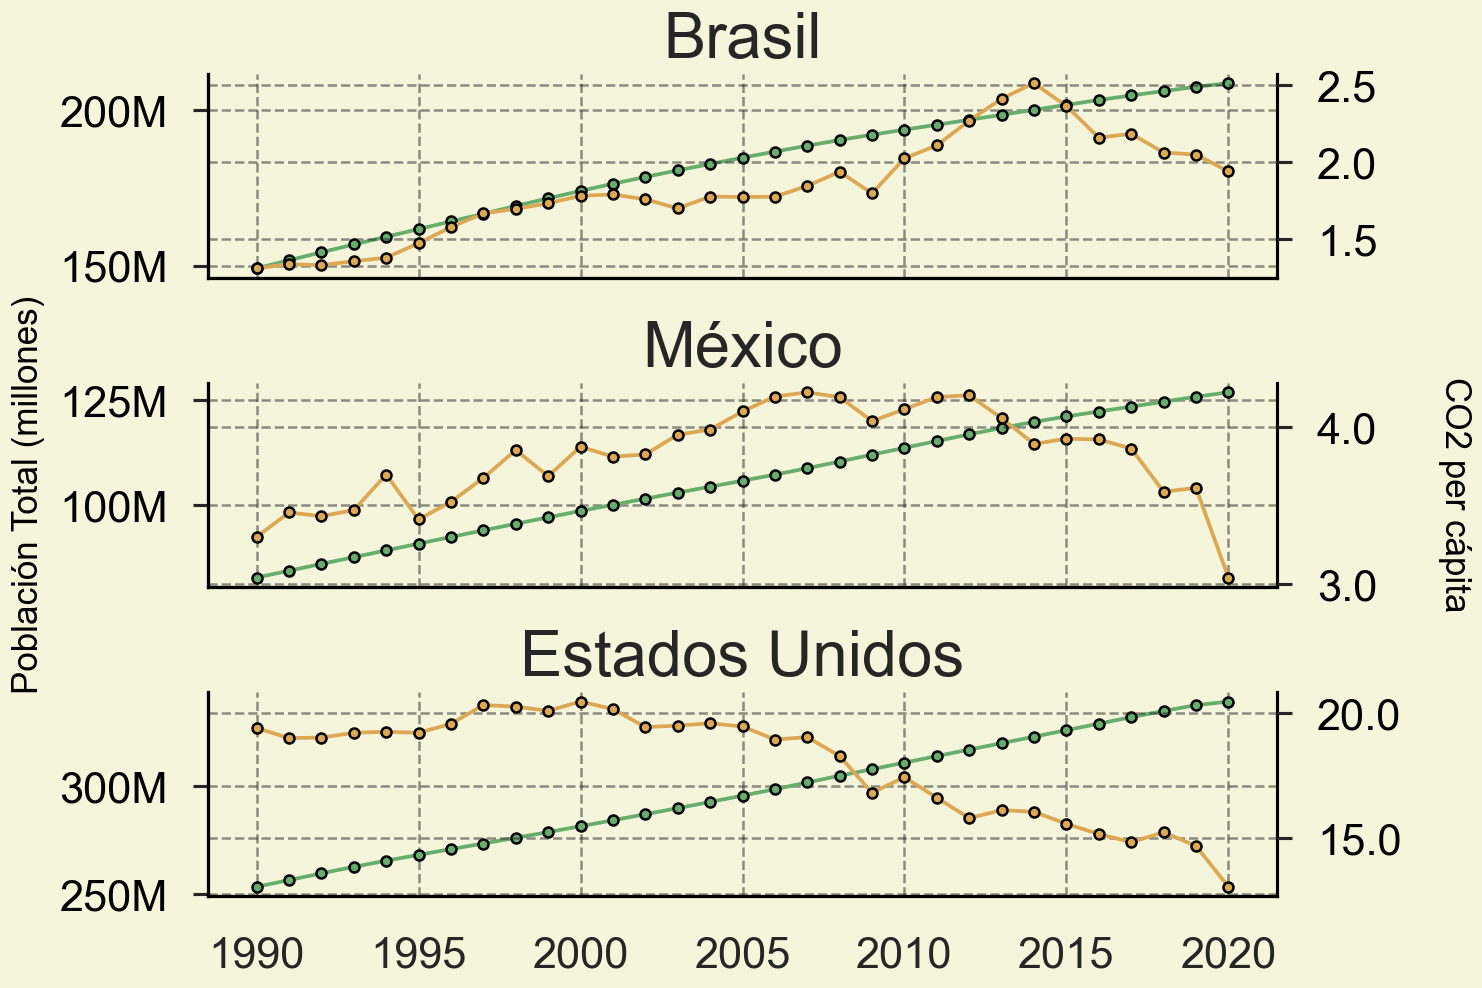

In [99]:
from matplotlib.ticker import FuncFormatter
emiciones_c02 = wb[wb['INDICATOR_LABEL'] == 'CO2 emissions (metric tons per capita)'].copy()
poblacion_unpd = unpd[unpd['IndicatorShortName'] == 'Total population by sex'].copy()

unificacion = poblacion_unpd.merge(
    emiciones_c02,
    left_on=['Iso3', 'Time'],
    right_on=['REF_AREA', 'TIME_PERIOD'],
    how='inner'
)
unificacion['Países'] = unificacion['PAIS_ESPANIOL_x']
paises_destacados = ['Brasil','México','Estados Unidos']
unificacion['Países'] = unificacion['Países'].where(
    unificacion['Países'].isin(paises_destacados),
    other='Otros'
)
unificacion = unificacion[unificacion['Países'] != 'Otros'].copy()
millions = FuncFormatter(lambda x, pos: f"{x*1e-6:.0f}M")

n = len(paises_destacados)
fig, axes = plt.subplots(nrows=n, ncols=1, sharex=True, figsize=(12, 2.8 * n))

for ax, pais in zip(axes, paises_destacados):
    df_ctry = unificacion[unificacion['Países'] == pais]

    # Eje izquierdo: población total
    ax.plot(
        df_ctry['Time'], df_ctry['Value'],
        color=PALETA[0], marker='o', linestyle='-',
        markersize=6
    )
    ax.set_ylabel('', color='black')
    ax.yaxis.set_major_formatter(millions)
    ax.tick_params(axis='y', labelcolor='black')
    # mostramos el spine derecho en negro
    ax.spines['right'].set_visible(True)
    ax.spines['right'].set_color('black')

    # Eje derecho: CO2 per cápita
    ax2 = ax.twinx()
    ax2.plot(
        df_ctry['Time'], df_ctry['OBS_VALUE'],
        color=PALETA[1], marker='o', linestyle='-',
        markersize=6
    )
    ax2.set_ylabel('', color='black')
    ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    ax2.tick_params(axis='y', labelcolor='black')
    # el spine derecho del twin también en negro
    ax2.spines['right'].set_color('black')

    ax.set_title(pais)

axes[-1].set_xlabel('', fontsize=14, color='black')
fig.supylabel('Población Total (millones)', fontsize=21, color='black')
fig.text(
    1.01, 0.5,
    'CO2 per cápita',
    va='center',
    rotation=-90,
    color='black',
    fontsize=21
)

plt.tight_layout()
plt.savefig("./img/emisiones_co2_poblacion_separado.png", bbox_inches='tight')
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_26476\4206911573.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = df_loss.groupby('TIME_PERIOD').apply(


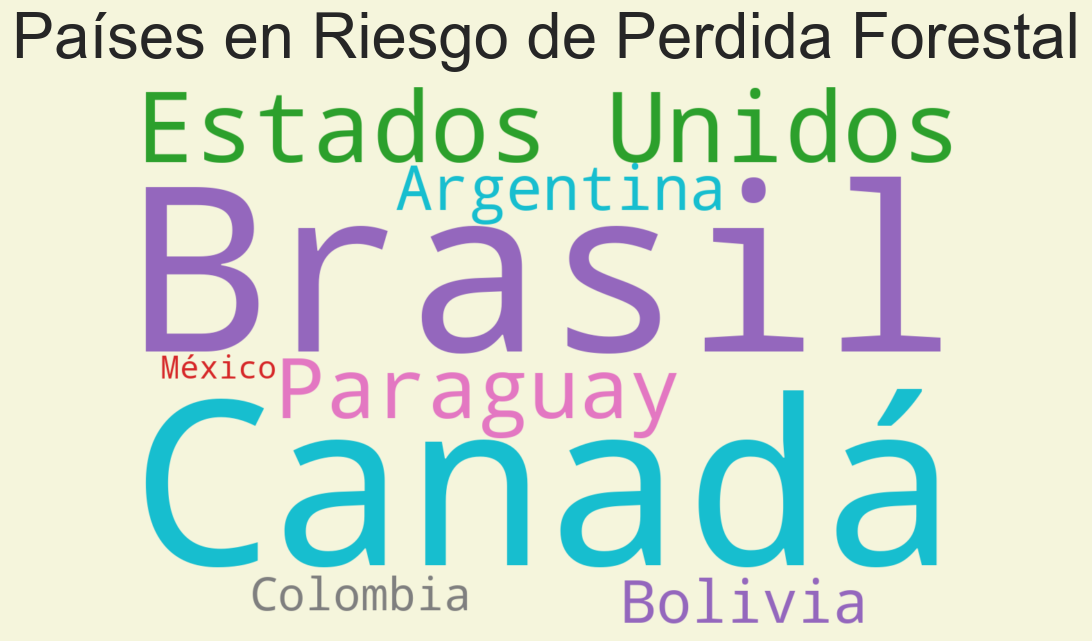

In [100]:
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

# Contar cuántas veces aparece cada país en el top 5 de pérdida de bosques por año
df_loss = wb[wb['INDICATOR_LABEL'] == 'Tree Cover Loss (hectares)'][['PAIS_ESPANIOL','TIME_PERIOD','OBS_VALUE']].copy()

# Para cada año, tomar los 5 mayores valores de 'OBS_VALUE' (pérdida de bosques) y extraer el país
top5 = df_loss.groupby('TIME_PERIOD').apply(
    lambda grp: grp.nlargest(5, 'OBS_VALUE')['PAIS_ESPANIOL']
)

top5 = top5.reset_index(drop=True)
counts = top5.value_counts().sort_values(ascending=False)


wc = WordCloud(
    width=1200,
    height=800,
    background_color=plt.rcParams['figure.facecolor'],
    colormap='tab10',
    margin=2
).generate_from_frequencies(counts.to_dict())

# mostrar con el estilo del tema
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Países en Riesgo de Perdida Forestal")
plt.savefig("./img/wordcloud_paises_perdida_forestal.png", bbox_inches='tight')
plt.show()

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Tema


PALETA = ["#67AE6E","#DDA853","#94B4C1","#BE3535"]
def set_style(mode='presentacion'):
    FECEOLOR = "#F5F5DC"
    EDGECOLOR = "#000"
    GRIDCOLOR = "#222222"
    """
    Configura estilos de seaborn/matplotlib según el modo:
      - 'presentacion': tipografía grande, fondo beige y rejilla destacada.
      - 'reporte': tipografía más pequeña, fondo blanco y rejilla suave.
    """
    context = "talk"
    rc = {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "DejaVu Sans"],
        "font.size": 12,
        # titulo
        "figure.titlesize": 38,
        "figure.titleweight": "bold",
        # ejes
        "axes.titlesize": 38,
        "xtick.labelsize": 26,
        "ytick.labelsize": 26,
        "axes.titlepad": 10,
        "axes.facecolor": FECEOLOR,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": EDGECOLOR,
        "axes.grid": True,
        # ejes rejilla
        "grid.color": GRIDCOLOR,
        "grid.linestyle": "--",
        "grid.linewidth": 1.5,
        "grid.alpha": 0.5,
        # ejes etiquetas
        "axes.labelsize": 2,
        # pad entre eje y etiquetas de valores
        "xtick.major.pad": 15,
        "ytick.major.pad": 15,
        # pad entre el nombre del eje y los ticks
        "axes.labelpad": 20,
        # leyenda
        "legend.fontsize": 18,
        "legend.title_fontsize": 20,
        "legend.labelspacing": 1.5,
        "legend.handlelength": 2,
        "legend.handleheight": 0.5,
        "legend.borderpad": 0.5,
        "legend.borderaxespad": 0.5,
        "legend.markerscale": 1.5,
        "legend.framealpha": 0.8,
        "legend.loc": "best",
        "legend.facecolor": FECEOLOR,
        "legend.shadow": True,
        "legend.edgecolor": EDGECOLOR,
        "legend.frameon": True,
        # fondo
        "figure.facecolor": FECEOLOR,
        # figura resolucion y tamaño
        "figure.dpi": 120,
        "figure.figsize": (12, 8),

        "patch.edgecolor": EDGECOLOR,   # color del borde
        "patch.linewidth": 1.0,         # grosor del borde
        "lines.markeredgecolor": EDGECOLOR,
        "lines.markeredgewidth": 1.5,
        }


    sns.set_theme(context=context, palette=PALETA, rc=rc)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETA)
set_style('presentacion')

In [103]:
df = pd.read_csv("../clean/WB_ESG_AMERICA.csv", dtype={19: str})

### Proyecciones

In [104]:
indicadores_interes = [
    'Renewable electricity output (% of total electricity output)',
    'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)'
]

df_filtrado = df[df['INDICATOR_LABEL'].isin(indicadores_interes)]

columnas_necesarias = ['PAIS_ESPANIOL', 'INDICATOR_LABEL', 'OBS_VALUE']
df_final = df_filtrado[columnas_necesarias]

In [105]:
df_pivoteado = df_final.drop_duplicates(
    subset=['PAIS_ESPANIOL', 'INDICATOR_LABEL']
).pivot(
    index='PAIS_ESPANIOL',
    columns='INDICATOR_LABEL',
    values='OBS_VALUE'
).reset_index()

df_pivoteado.columns = [
    'Pais',
    'Emisiones_CO2_LUCF',
    'Energia_Renovable_Porcentaje'
]

C:\Users\marti\AppData\Local\Temp\ipykernel_26476\2815241722.py:102: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\marti\AppData\Local\Temp\ipykernel_26476\2815241722.py:103: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('./img/energia_emisiones_america.png', dpi=500, bbox_inches='tight')
c:\Users\marti\miniconda3\envs\ydata\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


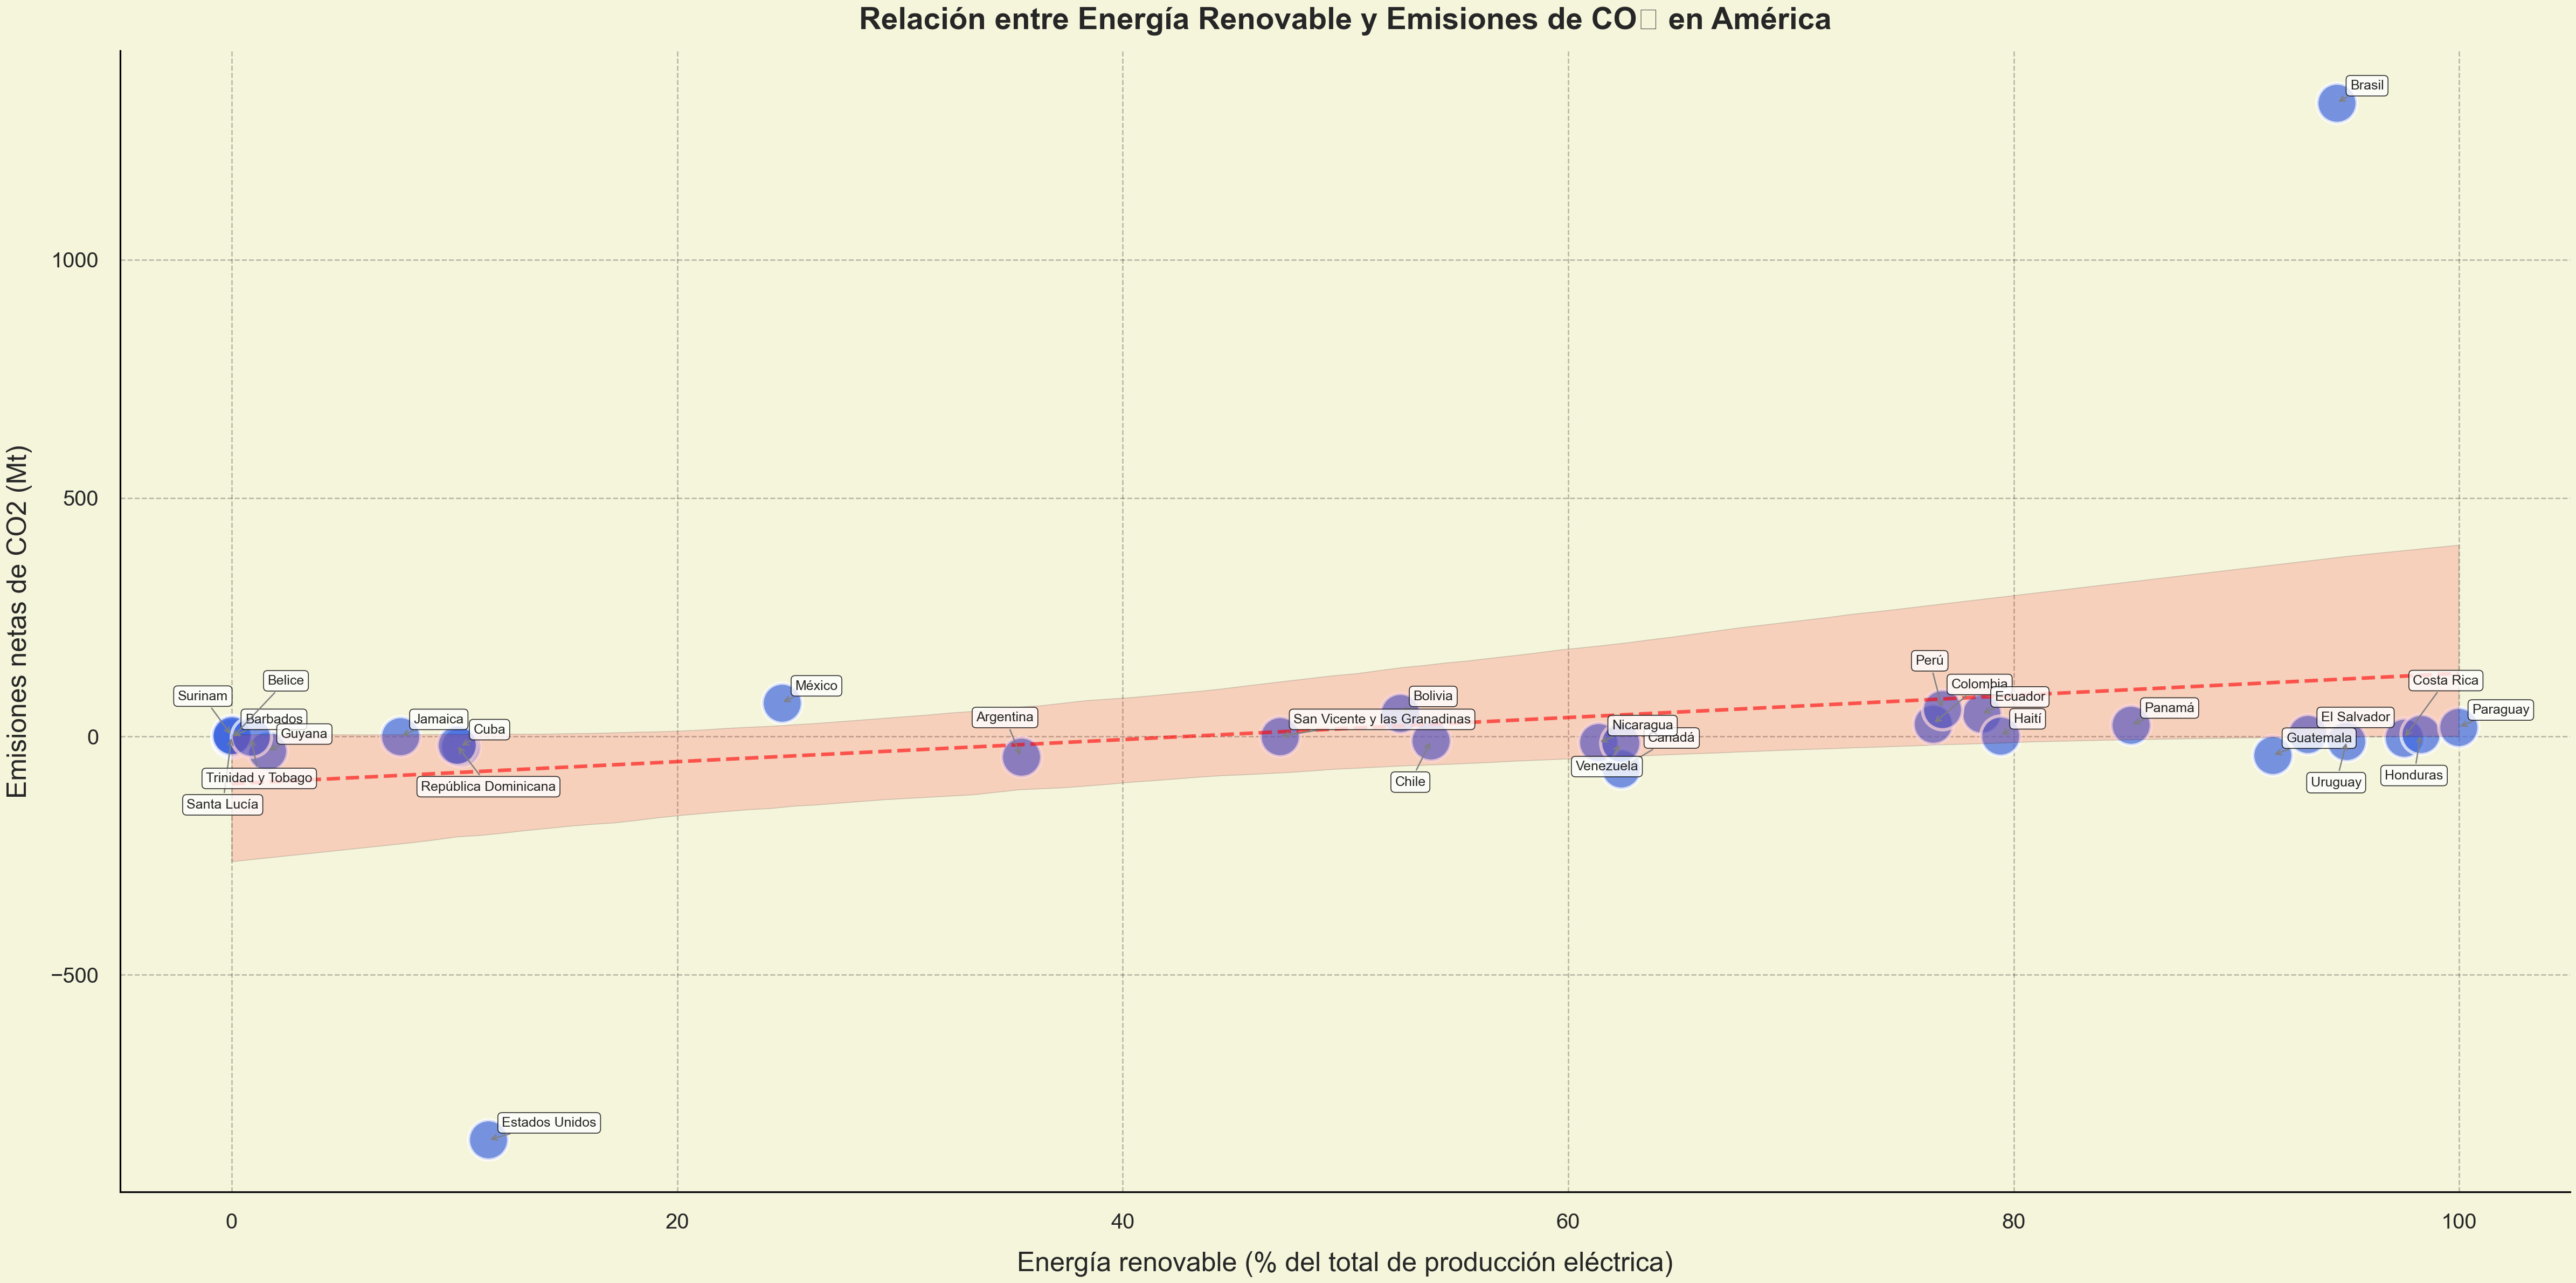

In [106]:
plt.figure(figsize=(40, 20))
scatter = sns.scatterplot(
    data=df_pivoteado,
    x='Energia_Renovable_Porcentaje',
    y='Emisiones_CO2_LUCF',
    s=2000,
    color='royalblue',
    alpha=0.7,
    legend=False
)

# Defini países destacados para poder mover sus posiciones
paises_destacados = [
    'Argentina', 'Barbados', 'Belice', 'Bolivia', 'Brasil', 'Canadá', 'Chile', 
    'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'Estados Unidos',
    'Guatemala', 'Guyana', 'Haití', 'Honduras', 'Jamaica', 'Las Bahamas',
    'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'República Dominicana',
    'San Vicente y las Granadinas', 'Santa Lucía', 'Surinam', 'Trinidad y Tobago',
    'Uruguay', 'Venezuela'
]

# Posiciones personalizadas para países clave 
posiciones_personalizadas = {
    'Belice': (40, 60),
    'Argentina': (-50, 40),
    'Surinam': (-60, 40),
    'Canadá': (30, 30),
    'Trinidad y Tobago': (-50, -50),
    'Chile': (-40, -50),
    'Uruguay': (-40, -50),
    'Honduras': (-40, -50),
    'República Dominicana': (-40, -50),
    'Venezuela': (-50, -30),
    'Colombia': (20, 40),
    'Las Bahamas': (-70, 30),
    'Costa Rica': (10, 60),
    'Perú': (-30, 50),
    'Santa Lucía': (-50, -80)
    # Posiciones por defecto para los demás países
}

# --- Añadir etiquetas con flechas ---
for i, row in df_pivoteado.iterrows():
    if row['Pais'] in paises_destacados:
        # Usar posición personalizada o asignar una por defecto
        xytext = posiciones_personalizadas.get(row['Pais'], (15, 15))
        
        plt.annotate(
            row['Pais'],
            xy=(row['Energia_Renovable_Porcentaje'], row['Emisiones_CO2_LUCF']),
            xytext=xytext,
            textcoords='offset points',
            fontsize=15,
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5)
        )

sns.regplot(
    data=df_pivoteado,
    x='Energia_Renovable_Porcentaje',
    y='Emisiones_CO2_LUCF',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.6, 'linewidth': 4}
)

plt.title(
    'Relación entre Energía Renovable y Emisiones de CO₂ en América',
    fontsize=34,
    pad=25,
    weight='bold'
)
plt.xlabel(
    'Energía renovable (% del total de producción eléctrica)',
    fontsize=30,
    labelpad=20
)
plt.ylabel(
    'Emisiones netas de CO2 (Mt)',
    fontsize=30,
    labelpad=20
)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True, linestyle='--', alpha=0.3)

corr_coef = np.corrcoef(
    df_pivoteado['Energia_Renovable_Porcentaje'],
    df_pivoteado['Emisiones_CO2_LUCF']
)[0, 1]
plt.text(
    0.96, 0.96,
    f'',
    transform=plt.gca().transAxes,
    fontsize=28,
    ha='right',
    va='top',
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.savefig('./img/energia_emisiones_america.png', dpi=500, bbox_inches='tight')
plt.show()

### Politicas de mitigacion

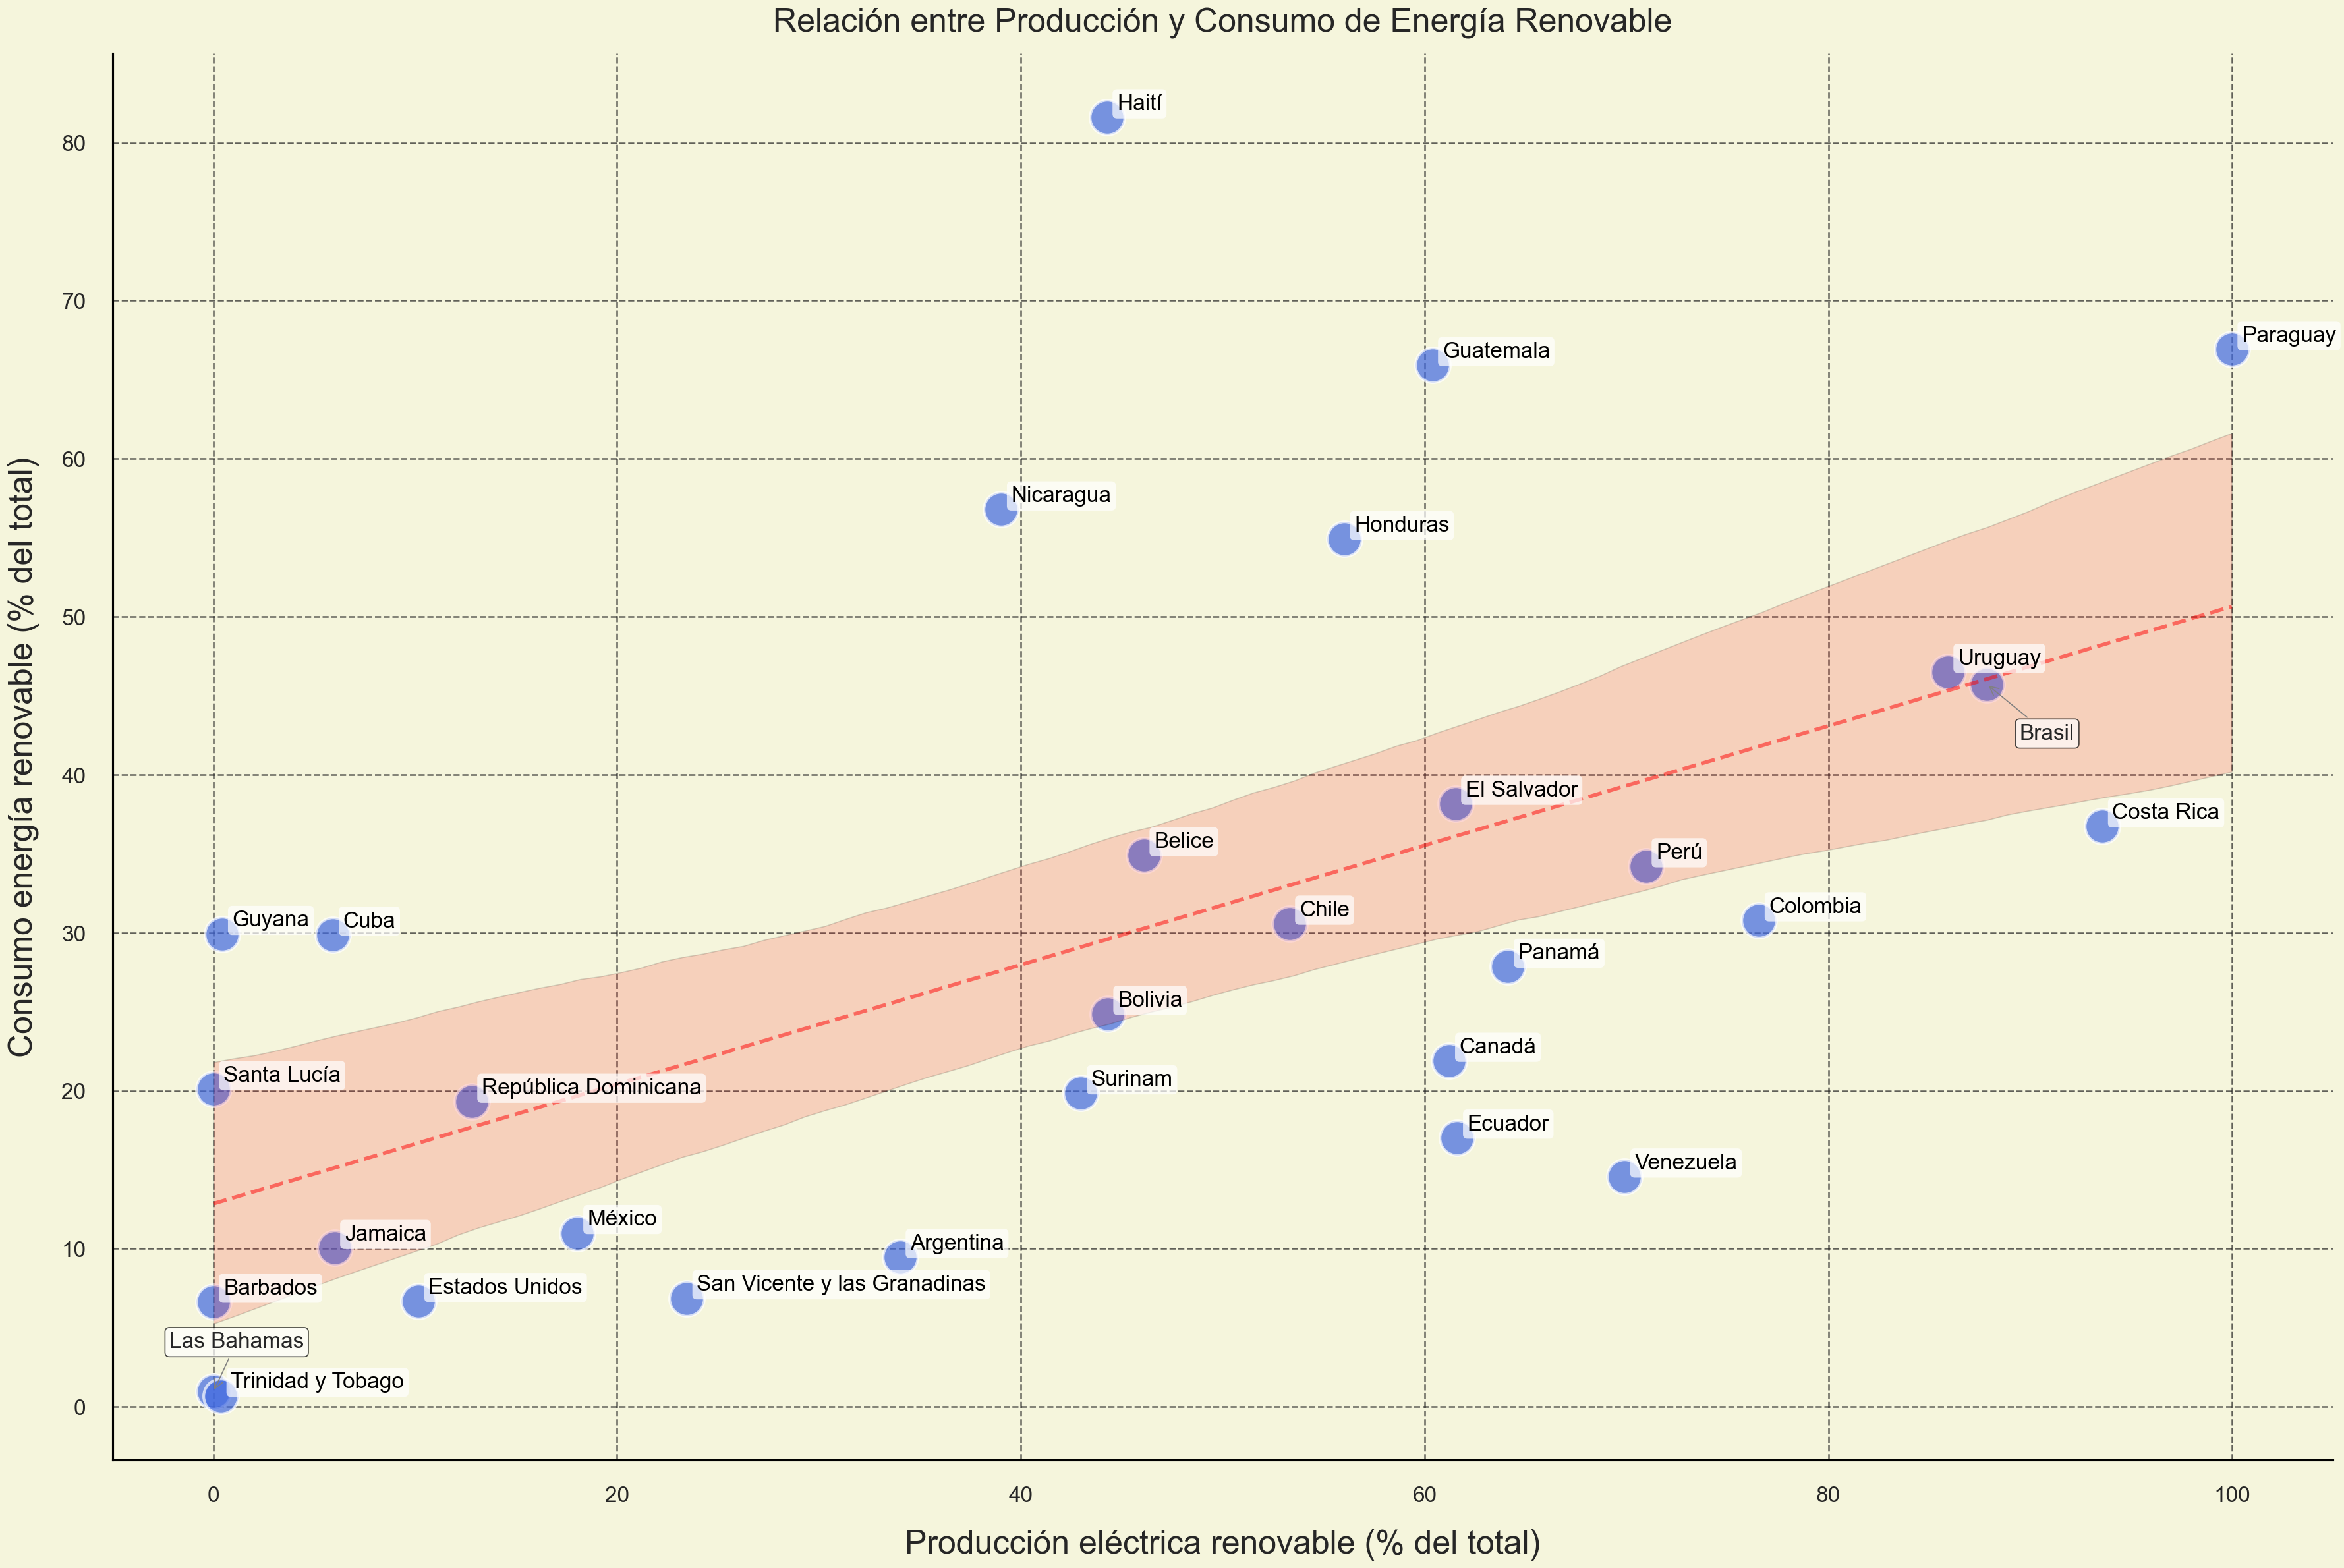

In [107]:
df_visualizacion = df[df['INDICATOR_LABEL'].isin([
    'Renewable electricity output (% of total electricity output)',
    'Renewable energy consumption (% of total final energy consumption)'
])].copy()


df_visualizacion['INDICATOR_LABEL'] = df_visualizacion['INDICATOR_LABEL'].replace({
    'Renewable electricity output (% of total electricity output)': 'Producción eléctrica renovable (% del total)',
    'Renewable energy consumption (% of total final energy consumption)': 'Consumo energía renovable (% del total)'
})


df_pivoted = df_visualizacion.groupby(['PAIS_ESPANIOL', 'INDICATOR_LABEL'])['OBS_VALUE'].mean().unstack().reset_index()


plt.figure(figsize=(30, 20))
scatter = sns.scatterplot(data=df_pivoted, 
                x='Producción eléctrica renovable (% del total)', 
                y='Consumo energía renovable (% del total)',
                s=1000,
                color='royalblue',
                alpha=0.7)

# Añadir etiquetas para todos los países
for i, row in df_pivoted.iterrows():
    if row['PAIS_ESPANIOL'] == 'Las Bahamas':
        plt.annotate(row['PAIS_ESPANIOL'],
                     xy=(row['Producción eléctrica renovable (% del total)'],
                         row['Consumo energía renovable (% del total)']),
                     xytext=(-40, 40),
                     textcoords='offset points',
                     fontsize=20,
                     bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'),
                     arrowprops=dict(arrowstyle='->', color='gray'))
    
    elif row['PAIS_ESPANIOL'] == 'Brasil':
        plt.annotate(row['PAIS_ESPANIOL'],
                     xy=(row['Producción eléctrica renovable (% del total)'],
                         row['Consumo energía renovable (% del total)']),
                     xytext=(30, -50),
                     textcoords='offset points',
                     fontsize=20,
                     bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'),
                     arrowprops=dict(arrowstyle='->', color='gray'))
    
    else:
        plt.text(x=row['Producción eléctrica renovable (% del total)']+0.5,
                 y=row['Consumo energía renovable (% del total)']+0.5,
                 s=row['PAIS_ESPANIOL'],
                 fontdict=dict(color='black', size=20),
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))


plt.title('Relación entre Producción y Consumo de Energía Renovable', fontsize=30, pad=20)
plt.xlabel('Producción eléctrica  (% del total de producción eléctrica)', fontsize=30)
plt.ylabel('Consumo de energía (% del consumo energético total final)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Línea de tendencia
sns.regplot(data=df_pivoted, 
           x='Producción eléctrica renovable (% del total)', 
           y='Consumo energía renovable (% del total)',
           scatter=False, 
           color='red', 
           line_kws={'linestyle':'--', 'alpha':0.5})

plt.tight_layout()
plt.savefig('./img/energia_consumo_america.png', dpi=500, bbox_inches='tight')
plt.show()

### Conclusiones y llamado a la accion

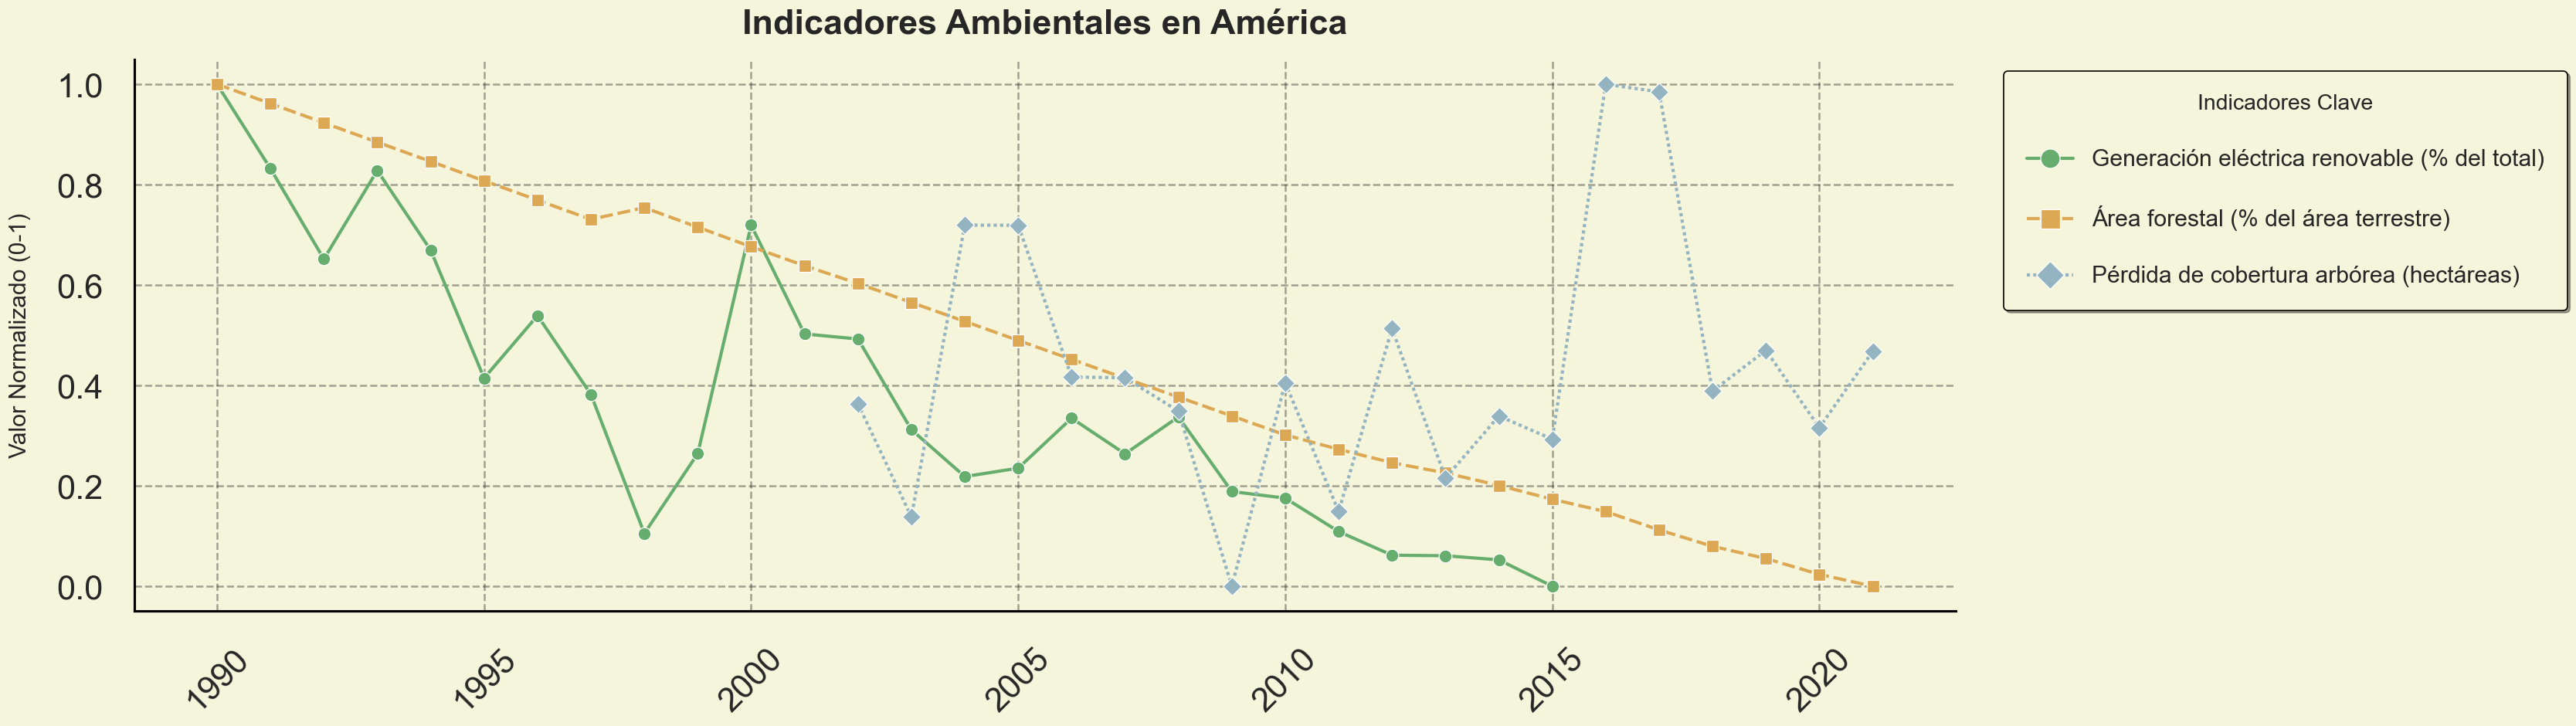

In [108]:
indicadores = {
    'Forest area (% of land area)': 'Área forestal (% del área terrestre)',
    'Tree Cover Loss (hectares)': 'Pérdida de cobertura arbórea (hectáreas)',
    'Renewable electricity output (% of total electricity output)': 'Generación eléctrica renovable (% del total)'
}

df_filtrado = df[df['INDICATOR_LABEL'].isin(indicadores.keys())].copy()
df_filtrado['INDICADOR_ESPANOL'] = df_filtrado['INDICATOR_LABEL'].map(indicadores)


df_agrupado = df_filtrado.groupby(['TIME_PERIOD', 'INDICADOR_ESPANOL'], as_index=False)['OBS_VALUE'].sum()

# Normalización robusta (0-1)
df_normalizado = df_agrupado.copy()
for indicador in indicadores.values():
    subset = df_agrupado[df_agrupado['INDICADOR_ESPANOL'] == indicador]
    min_val = subset['OBS_VALUE'].min()
    max_val = subset['OBS_VALUE'].max()
    range_val = max_val - min_val
    
    # Manejo seguro de división por cero
    df_normalizado.loc[df_normalizado['INDICADOR_ESPANOL'] == indicador, 'OBS_VALUE_NORM'] = (
        (subset['OBS_VALUE'] - min_val) / (range_val if range_val != 0 else 1)
    )

plt.figure(figsize=(28, 8))
ax = sns.lineplot(
    data=df_normalizado,
    x='TIME_PERIOD',
    y='OBS_VALUE_NORM',
    hue='INDICADOR_ESPANOL',
    style='INDICADOR_ESPANOL',
    markers=['o', 's', 'D'],  
    markersize=10,
    linewidth=2.5
)
plt.title('Indicadores Ambientales en América', 
          fontsize=27, pad=20, fontweight='bold')
plt.ylabel('Valor Normalizado (0-1)', fontsize=18)
plt.xlabel('', fontsize=14)
plt.xticks(rotation=45)

legend = plt.legend(
    title='Indicadores Clave',
    title_fontsize='17',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    shadow=True,
    borderpad=1
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('./img/indicadores_ambientales_america.png', dpi=500, bbox_inches='tight')
plt.show()